In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency,kruskal 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score,roc_auc_score,roc_curve
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression

**Reading the file**

In [3]:
df=pd.read_csv("train.csv",index_col='Patient Id')
df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
Patient Id,,,,,,,,,,,,,,,,,,,,,
PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
df=df.drop('Genetic Disorder',axis=1)

# Data Analysis

In [5]:
df.shape

(22083, 43)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22083 entries, PID0x6418 to PID0x9332
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Patient First Name                                22083 non-null  object 
 7   Family Name                                       12392 non-null  object 
 8   Father's name                                     22083 non-null  object 
 9   Mother's a

-- Inference:
- 1)The dataset has  22083 entries with 44 columns.
- 2)The data is present in float and object dtype.
- 3)The dataset has 16 float type columns and 28 object types columns.
- 4)Presence of large number of Missing values.

In [7]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Patient First Name', 'Family Name', 'Father's name', 'Mother's age',
       'Father's age', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
   

- We have columns like 'Patient First Name', 'Family Name',"Father's name",'Institute Name','Location of Institute','Place of birth' which are not useful for analysis.

In [8]:
df.drop(['Patient First Name', 'Family Name',"Father's name",'Institute Name','Location of Institute','Place of birth'],axis=1,inplace=True)

***Numeric columns analysis***

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient Age,20656.0,6.974148,4.319475,0.000000,3.000000,7.000000,11.000000,14.000000
Blood cell count (mcL),22083.0,4.898871,0.199663,4.092727,4.763109,4.899399,5.033830,5.609829
Mother's age,16047.0,34.526454,9.852598,18.000000,26.000000,35.000000,43.000000,51.000000
Father's age,16097.0,41.972852,13.035501,20.000000,31.000000,42.000000,53.000000,64.000000
Test 1,19956.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 2,19931.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 3,19936.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 4,19943.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test 5,19913.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
No. of previous abortion,19921.0,2.003062,1.411919,0.000000,1.000000,2.000000,3.000000,4.000000


In [10]:
for col in df.select_dtypes(np.number).columns:
    print(df[col].value_counts())
    print("_____________________________________________")

4.0     1435
12.0    1435
9.0     1415
2.0     1396
5.0     1394
0.0     1386
13.0    1384
3.0     1383
6.0     1374
1.0     1364
11.0    1353
7.0     1351
8.0     1340
14.0    1333
10.0    1313
Name: Patient Age, dtype: int64
_____________________________________________
4.760603    1
4.800413    1
4.874316    1
4.592124    1
5.190047    1
           ..
5.128740    1
4.769116    1
4.916183    1
4.717727    1
4.738067    1
Name: Blood cell count (mcL), Length: 22083, dtype: int64
_____________________________________________
23.0    525
19.0    516
40.0    515
47.0    508
28.0    508
48.0    507
41.0    502
45.0    490
44.0    489
21.0    488
35.0    484
24.0    480
49.0    479
50.0    476
30.0    473
27.0    471
29.0    469
38.0    465
32.0    465
42.0    464
22.0    463
37.0    463
46.0    460
26.0    457
31.0    457
20.0    451
51.0    449
34.0    447
18.0    443
33.0    441
43.0    437
36.0    436
25.0    435
39.0    434
Name: Mother's age, dtype: int64
____________________________

- Here test1,test2,test3,test4 are having only one class which will not give us any kind of information.So,we have remove it.
- Symptom1,Symptom2,Symtom3,Symptom4,Symptom5 has only two class.It needs to change its dtype to object

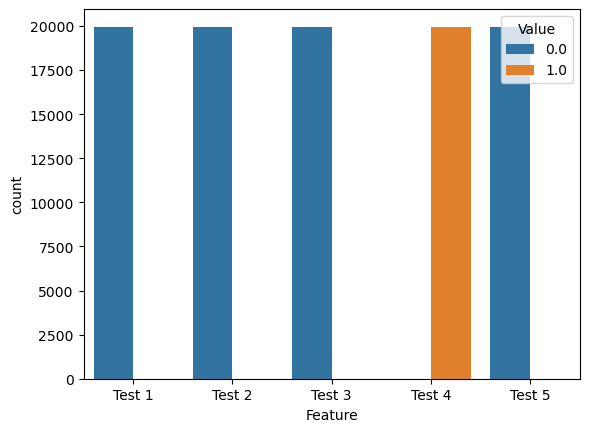

In [11]:
x1=df[['Test 1','Test 2','Test 3','Test 4','Test 5']]
df3 = pd.DataFrame(x1)
df_melted = df3.melt(value_vars=df3.columns, var_name='Feature', value_name='Value')
sns.countplot(x='Feature', hue='Value', data=df_melted)
plt.show()

In [12]:
df.drop(['Test 1','Test 2','Test 3','Test 4','Test 5'],axis=1,inplace=True)

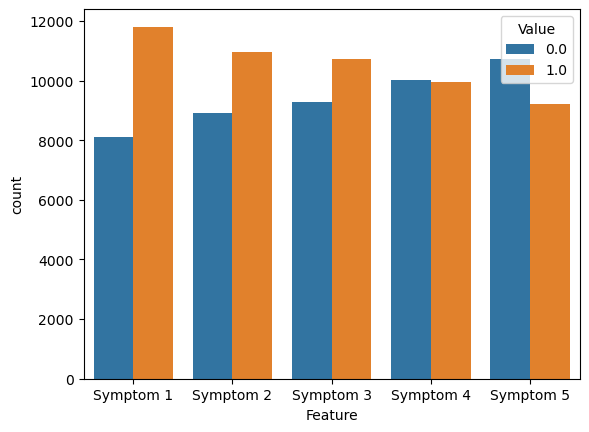

In [13]:
x2=df[['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']]
df4 = pd.DataFrame(x2)
df_melted = df4.melt(value_vars=df4.columns, var_name='Feature', value_name='Value')
sns.countplot(x='Feature', hue='Value', data=df_melted)
plt.show()

In [14]:
sym=['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']
for i in sym:
    df[i]=df[i].astype('object')

In [15]:
#Visual

Skewness:  0.009507414389619285
Kurtosis:  -1.2155976740982202


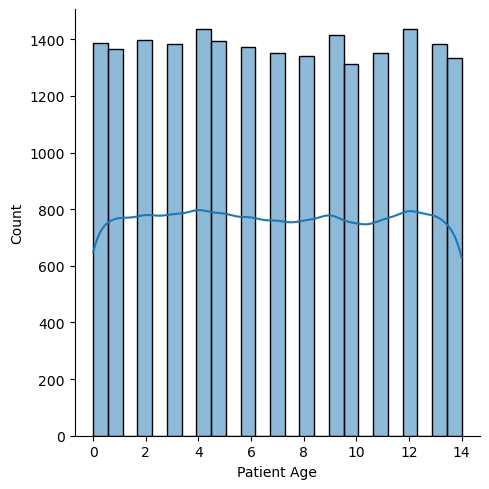

_____________________________________________
Skewness:  0.010023413859458657
Kurtosis:  -0.0628214189998677


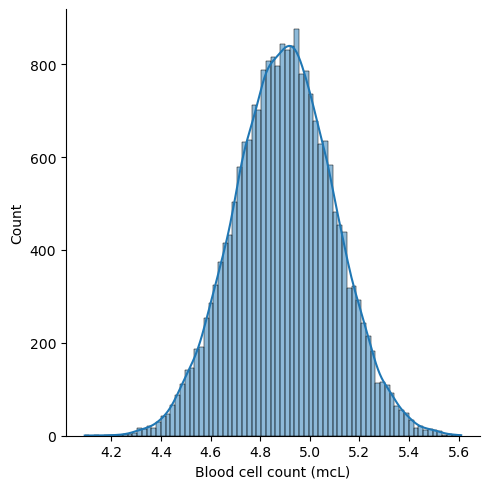

_____________________________________________
Skewness:  -0.00515387187308008
Kurtosis:  -1.2230880832864286


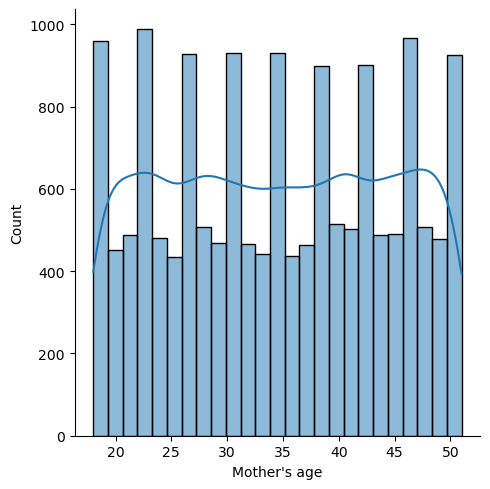

_____________________________________________
Skewness:  -0.005839712015218688
Kurtosis:  -1.2138555170090066


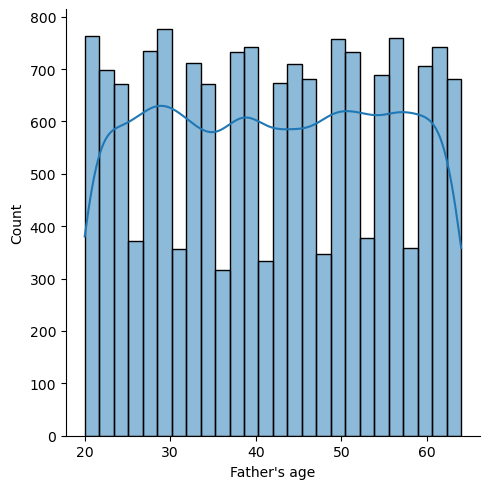

_____________________________________________
Skewness:  -0.0010309052920366372
Kurtosis:  -1.2903552351093646


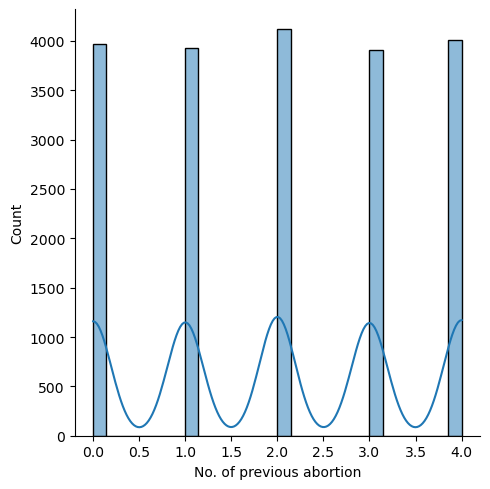

_____________________________________________
Skewness:  0.006638939164652449
Kurtosis:  -0.9745044669970935


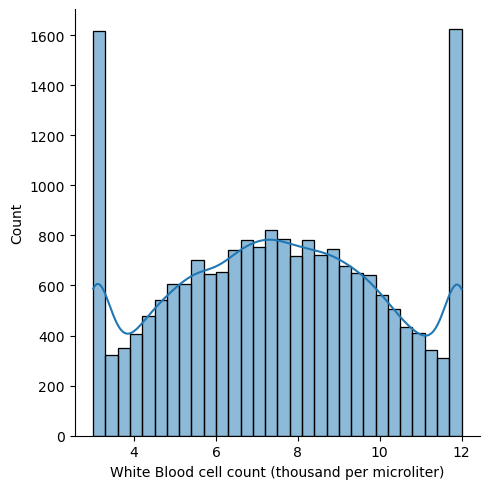

_____________________________________________


In [16]:
for col in df.select_dtypes(np.number).columns:
    print("Skewness: ",df[col].skew())
    print("Kurtosis: ",df[col].kurt())
    sns.displot(x=df[col],kde=True)
    plt.show()
    print("_____________________________________________")

**Category Column Analysis**

In [17]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Genes in mother's side,22083,2,Yes,13143
Inherited from father,21777,2,No,13133
Maternal gene,19273,2,Yes,10647
Paternal gene,22083,2,No,12508
Status,22083,2,Alive,11083
Respiratory Rate (breaths/min),19934,2,Normal (30-60),10065
Heart Rate (rates/min,19970,2,Normal,10187
Parental consent,19958,1,Yes,19958
Follow-up,19917,2,Low,10040
Gender,19910,3,Ambiguous,6695


In [18]:
for col in df.select_dtypes(exclude=np.number).columns:
    print(df[col].value_counts())
    print("_____________________________________________")

Yes    13143
No      8940
Name: Genes in mother's side, dtype: int64
_____________________________________________
No     13133
Yes     8644
Name: Inherited from father, dtype: int64
_____________________________________________
Yes    10647
No      8626
Name: Maternal gene, dtype: int64
_____________________________________________
No     12508
Yes     9575
Name: Paternal gene, dtype: int64
_____________________________________________
Alive       11083
Deceased    11000
Name: Status, dtype: int64
_____________________________________________
Normal (30-60)    10065
Tachypnea          9869
Name: Respiratory Rate (breaths/min), dtype: int64
_____________________________________________
Normal         10187
Tachycardia     9783
Name: Heart Rate (rates/min, dtype: int64
_____________________________________________
Yes    19958
Name: Parental consent, dtype: int64
_____________________________________________
Low     10040
High     9877
Name: Follow-up, dtype: int64
_____________________

- Inference:
- Mostly all columns has three classes 'Yes','No' or 'Not available'.
- 'Parental consent' has only one class which has information to learn.So,we can drop it.
- Some columns has misclassified class.Which needs correction.

In [19]:
df.drop('Parental consent',axis=1,inplace=True)

In [20]:
df['Respiratory Rate (breaths/min)']=df['Respiratory Rate (breaths/min)'].replace({'Normal (30-60)':'Normal'})

In [21]:
df['Birth asphyxia']=df['Birth asphyxia'].replace({'Not available':"No record"})

In [22]:
df['Autopsy shows birth defect (if applicable)']=df['Autopsy shows birth defect (if applicable)'].replace({'None':'Not applicable'})

In [23]:
df['H/O radiation exposure (x-ray)']=df['H/O radiation exposure (x-ray)'].replace({'-':np.nan})

In [24]:
df['H/O substance abuse']=df['H/O substance abuse'].replace({'-':np.nan})

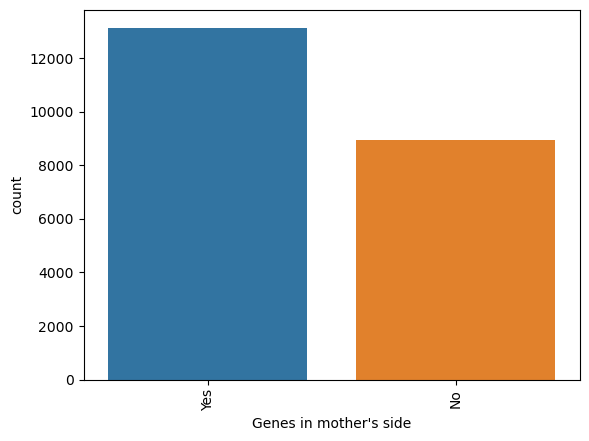

_____________________________________________________________________________


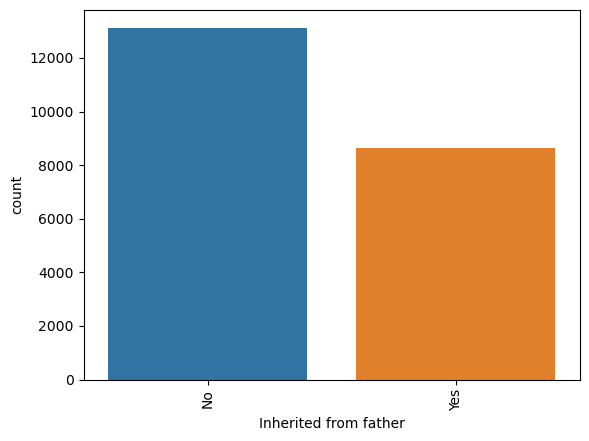

_____________________________________________________________________________


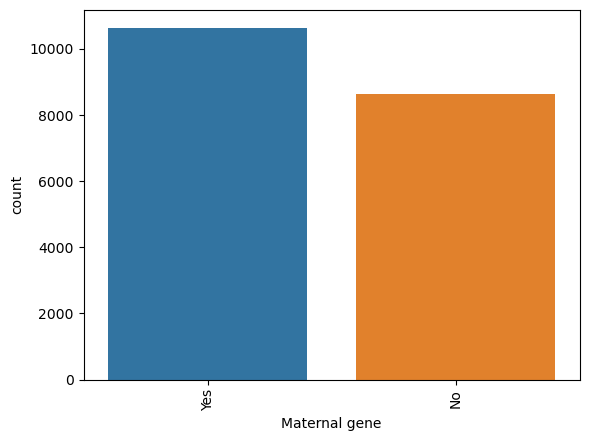

_____________________________________________________________________________


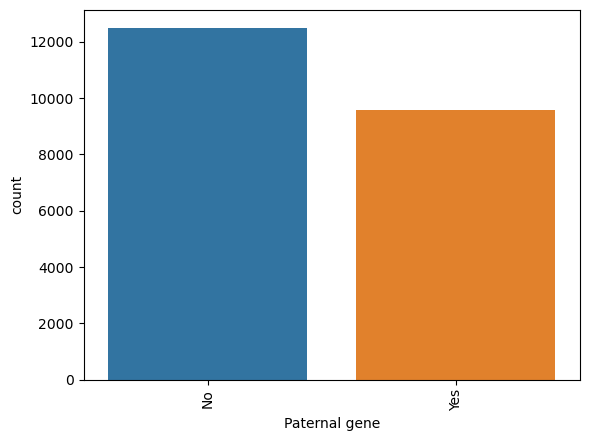

_____________________________________________________________________________


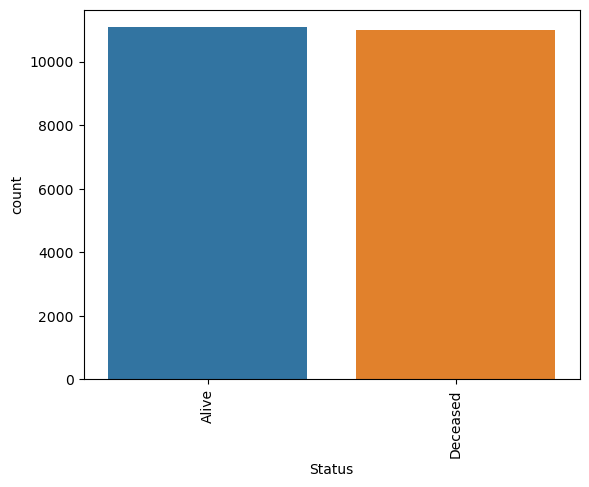

_____________________________________________________________________________


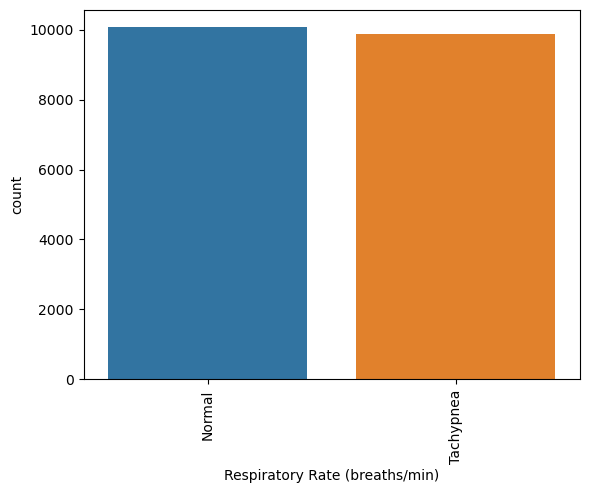

_____________________________________________________________________________


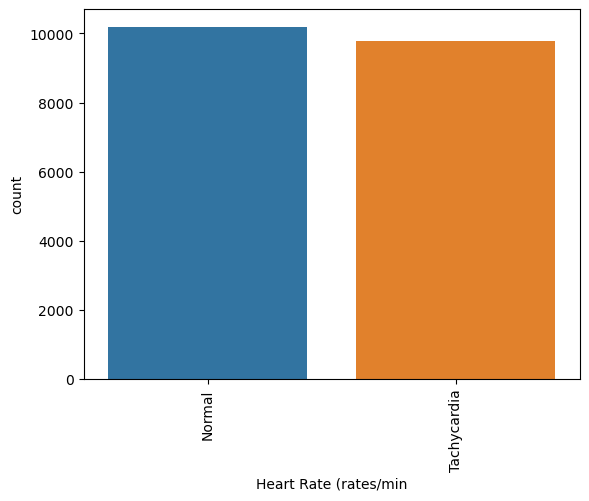

_____________________________________________________________________________


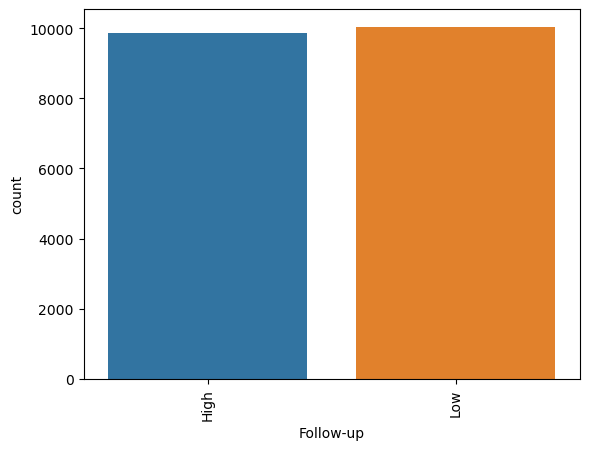

_____________________________________________________________________________


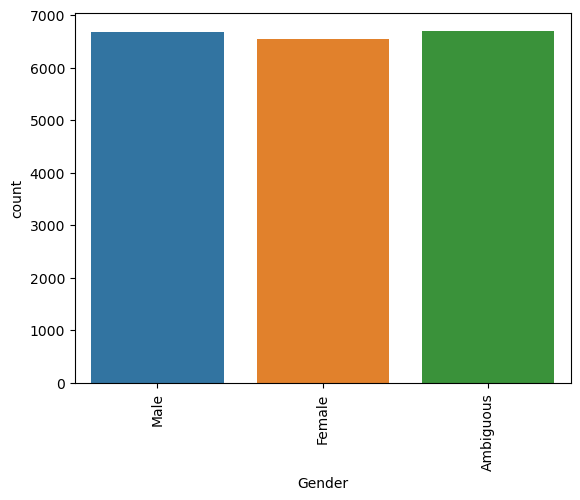

_____________________________________________________________________________


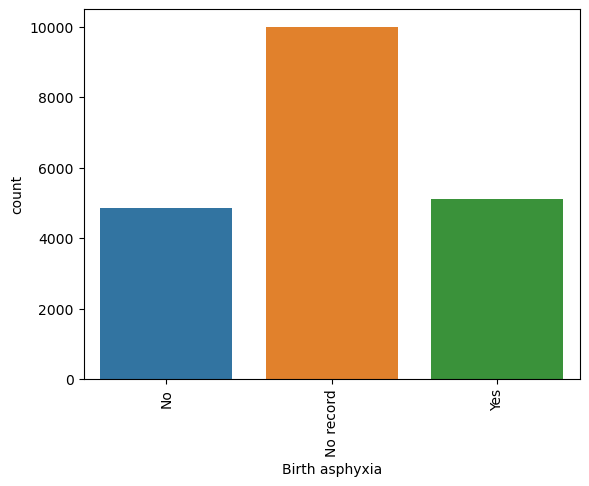

_____________________________________________________________________________


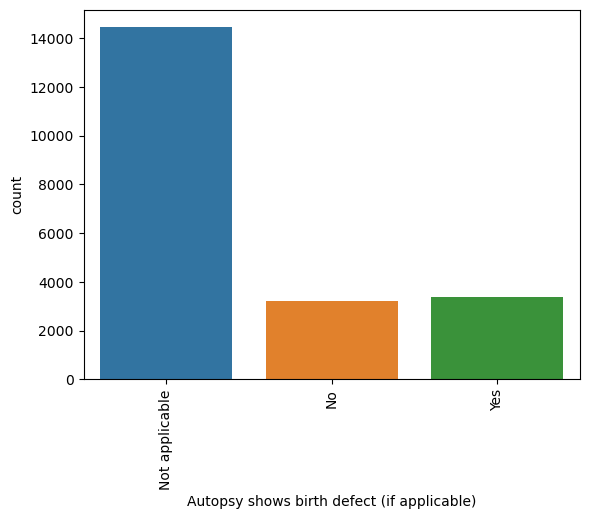

_____________________________________________________________________________


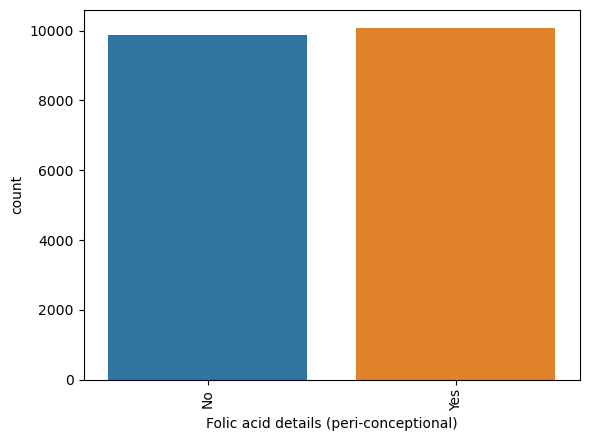

_____________________________________________________________________________


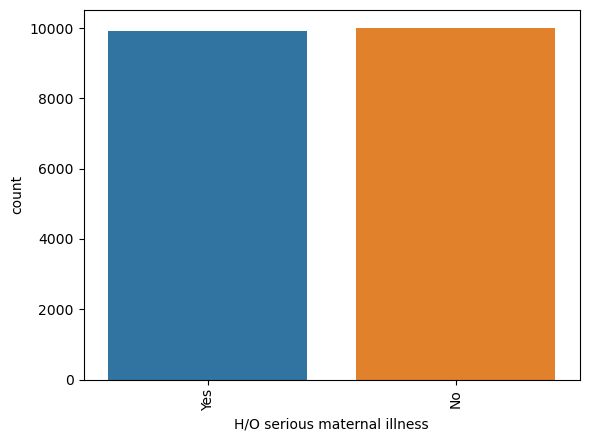

_____________________________________________________________________________


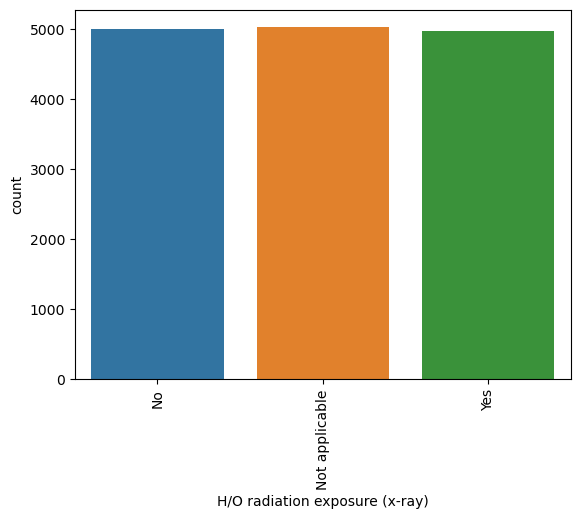

_____________________________________________________________________________


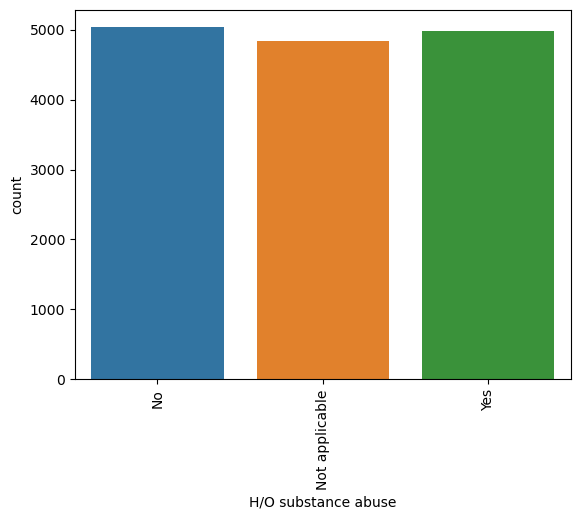

_____________________________________________________________________________


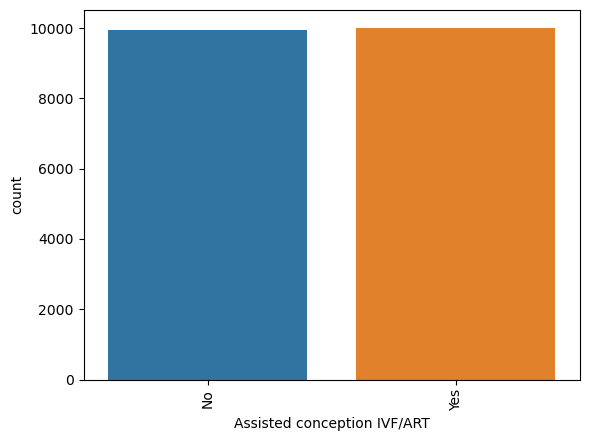

_____________________________________________________________________________


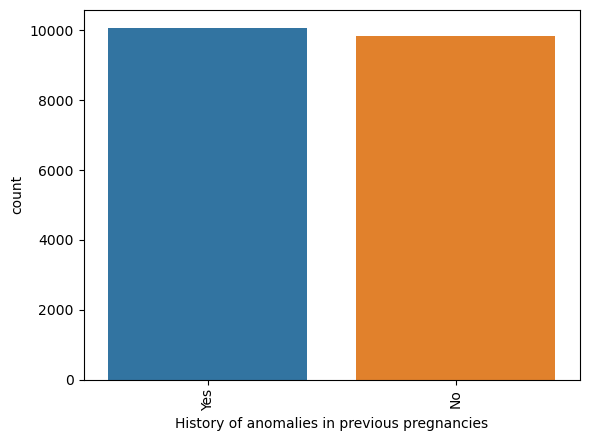

_____________________________________________________________________________


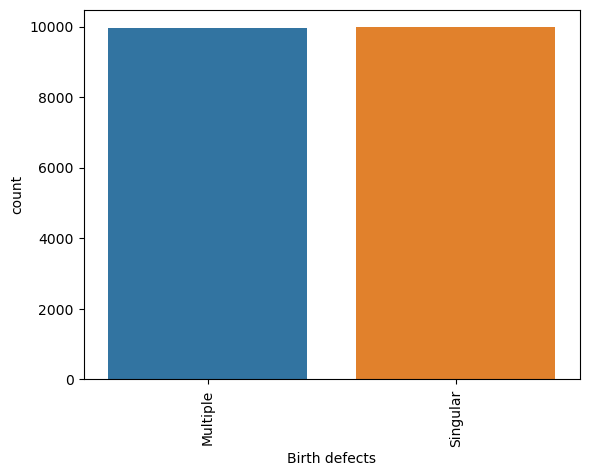

_____________________________________________________________________________


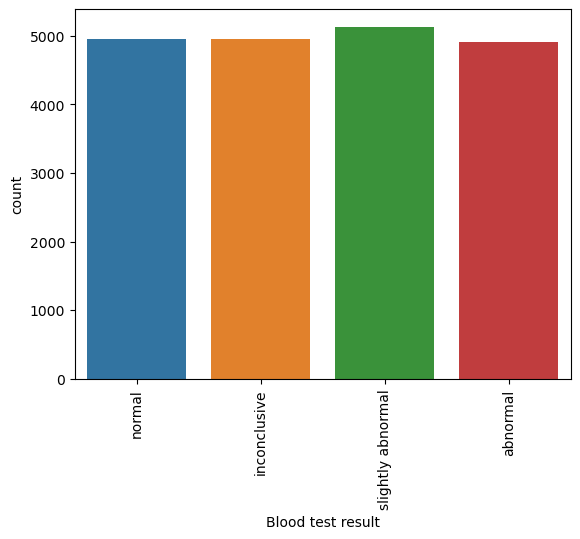

_____________________________________________________________________________


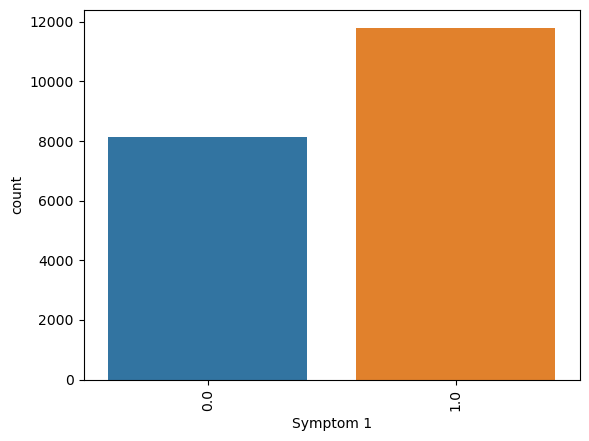

_____________________________________________________________________________


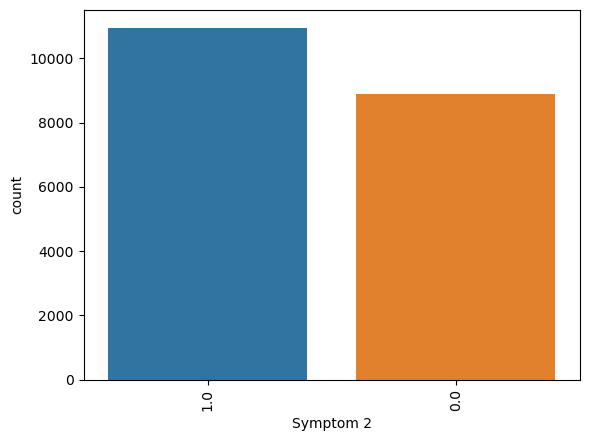

_____________________________________________________________________________


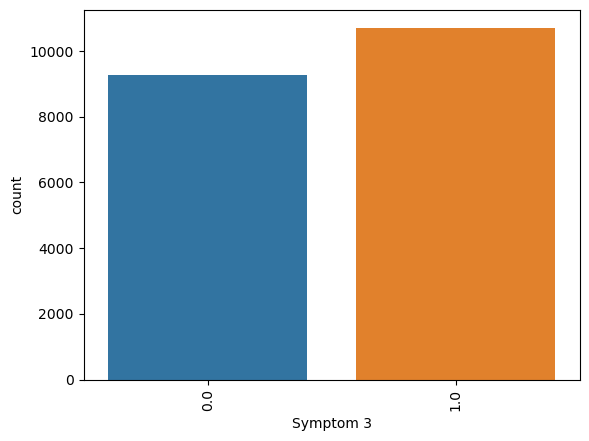

_____________________________________________________________________________


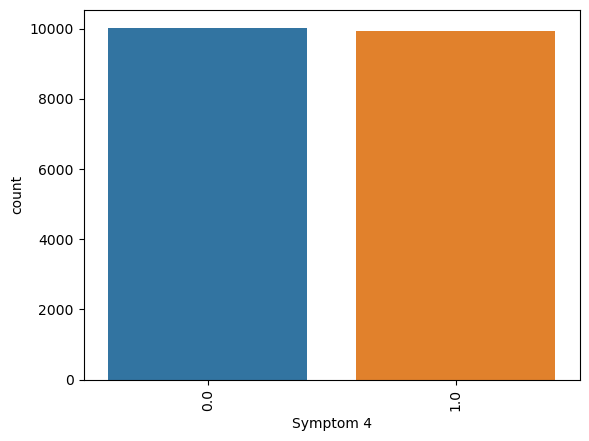

_____________________________________________________________________________


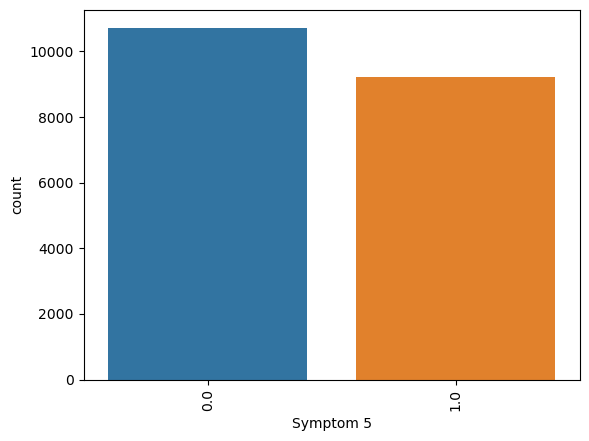

_____________________________________________________________________________


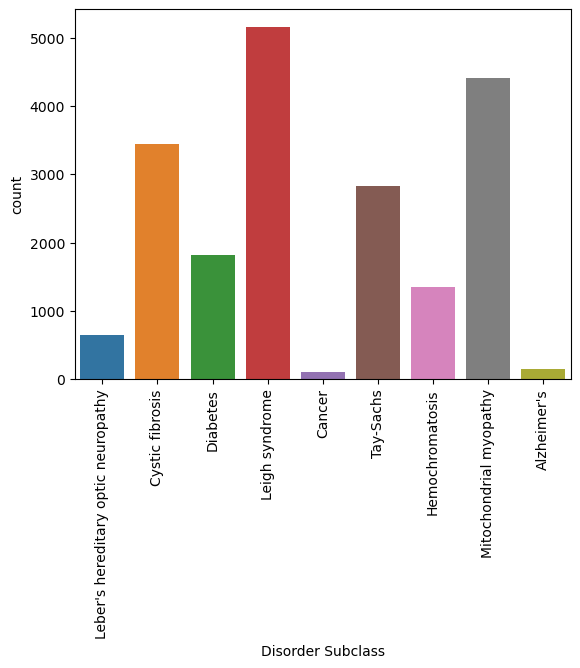

_____________________________________________________________________________


In [25]:
for col in df.select_dtypes(exclude=np.number).columns:
    sns.countplot(x=df[col])
    plt.xticks(rotation=90)
    plt.show()
    print("_____________________________________________________________________________")

**Target Column Analysis**

In [26]:
df['Disorder Subclass'].value_counts()

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64

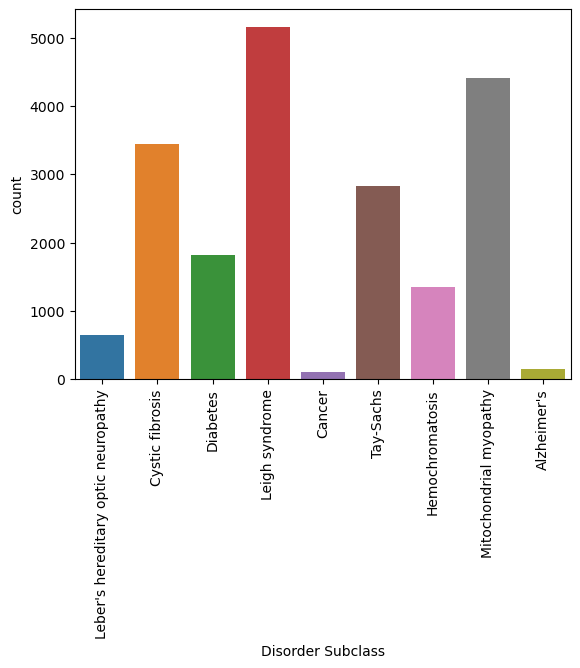

In [27]:
sns.countplot(x=df['Disorder Subclass'])
plt.xticks(rotation=90)
plt.show()

- We have 9 different genetic disorders subclass with different count.But since,for each disorder subclass we donot has enough columns to learn.We will select the top 4 disorder subclasses with respect to our analysis.

<Axes: >

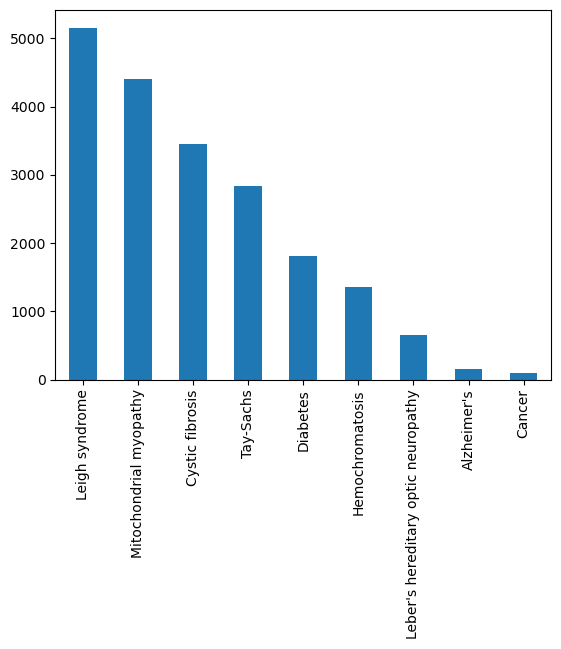

In [28]:
df['Disorder Subclass'].value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: >

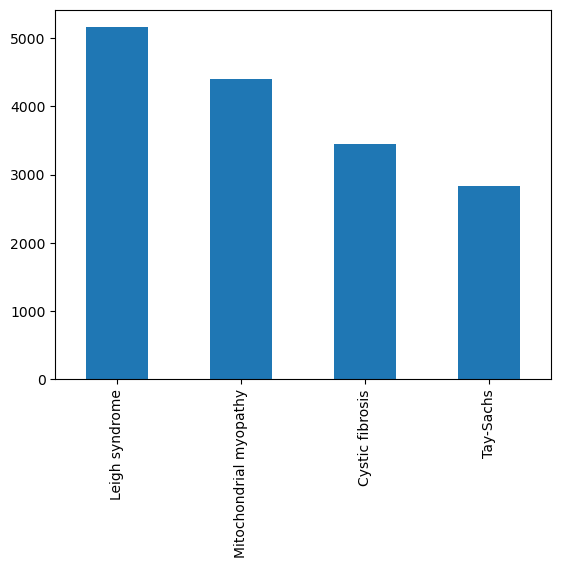

In [29]:
Top_4=df['Disorder Subclass'].value_counts().sort_values(ascending=False).head(4)
Top_4.plot(kind='bar')

- Rest of the subclasses we will remove

In [30]:
df=df[~((df['Disorder Subclass']=="Leber's hereditary optic neuropathy")|(df['Disorder Subclass']=="Alzheimer's")|(df['Disorder Subclass']=="Cancer")|(df['Disorder Subclass']=="Diabetes")|(df['Disorder Subclass']=="Hemochromatosis"))]


# Data-Preprocessing

**Missing value Treatment**

In [31]:
df.isnull().sum()

Patient Age                                         1166
Genes in mother's side                                 0
Inherited from father                                256
Maternal gene                                       2328
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        4979
Father's age                                        4974
Status                                                 0
Respiratory Rate (breaths/min)                      1793
Heart Rate (rates/min                               1731
Follow-up                                           1787
Gender                                              1829
Birth asphyxia                                      1794
Autopsy shows birth defect (if applicable)           842
Folic acid details (peri-conceptional)              1716
H/O serious maternal illness                        1769
H/O radiation exposure (x-ray) 

- Inference:
    -- We have large number of Missing values.


- Course of Action:
- Since,this is a Healthcare dataset.We cannot impute the missing values with central tendencies as it will hinder the interpretation.For this we will use Statistical tests to see which column is affection by which other column and do the imputation.
- First, we will see which columns are significantly affecting the target.For those we will use statistical methods for missing value imputation.
- for non significant column with respect to target.We will use Central tendency imputation

**Missing value treatment for 'Disorder Subclass'**

- We cannot do imputation in the target column so we are directly removing the rows where there is a null value in target column.

In [32]:
# drop rows where target features are not available
df.dropna(subset=['Disorder Subclass'], how='any', inplace=True)
df.shape

(15846, 31)

**Categorical columns significantly affecting the target('Disorder Subclass')**

In [33]:
p_v=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df['Disorder Subclass'], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    p_v.append(round(p,2))
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("--------------------------------------------------------------------")
    

Genes in mother's side
Chi-squared statistic: 290.2931835916835
P-value: 1.2545356197538722e-62
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
Inherited from father
Chi-squared statistic: 273.3015019983938
P-value: 5.959013925555373e-59
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
Maternal gene
Chi-squared statistic: 238.09771655045554
P-value: 2.4539635878087126e-51
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
Paternal gene
Chi-squared statistic: 212.886206431004
P-value: 6.9244822741814254e-46
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
Status
Chi-squared statistic: 5.668143147329731
P-value: 0.12892061562206247
Fail to reject the null hypothe

In [34]:
p_value_cat=pd.DataFrame()
p_value_cat['Features']=df.select_dtypes(exclude=np.number).columns
p_value_cat['p_values']=p_v


In [35]:
p_value_cat.sort_values(by='p_values',ascending=True)


,Features,p_values
0,Genes in mother's side,0.00
22,Symptom 4,0.00
21,Symptom 3,0.00
20,Symptom 2,0.00
19,Symptom 1,0.00
23,Symptom 5,0.00
24,Disorder Subclass,0.00
1,Inherited from father,0.00
2,Maternal gene,0.00
3,Paternal gene,0.00


- if p_val>0.05:
    return "Non-significant"
  elif p_val<0.05:
    return 'SIgnificant'
- So,"Genes in mother's side","Symptom-1,2,3,4,5" , 'Inherited from father','Maternal gene','Paternal gene','Birth defects' are significant with respect to the 'Target'.

**Numerical columns significantly affecting the target**

In [36]:
p_val=[]
for i in df.select_dtypes(include=np.number):
    print(i)
    result = kruskal(df[i][df["Disorder Subclass"]=="Alzheimer's"],
                     df[i][df["Disorder Subclass"]=="Cancer"],
                     df[i][df['Disorder Subclass']=="Cystic fibrosis"],
                     df[i][df['Disorder Subclass']=='Diabetes'],
                    df[i][df['Disorder Subclass']=="Hemochromatosis"],
                    df[i][df["Disorder Subclass"]=="Leber's hereditary optic neuropathy"],
                    df[i][df['Disorder Subclass']=="Leigh syndrome"],
                    df[i][df['Disorder Subclass']=="Mitochondrial myopathy"],
                    df[i][df['Disorder Subclass']=="Tay-Sachs"])

    p_value = result.pvalue
    p_val.append(round(p_value,2))
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")

Patient Age
Fail to reject the null hypothesis. No significant difference.
Blood cell count (mcL)
Fail to reject the null hypothesis. No significant difference.
Mother's age
Fail to reject the null hypothesis. No significant difference.
Father's age
Fail to reject the null hypothesis. No significant difference.
No. of previous abortion
Fail to reject the null hypothesis. No significant difference.
White Blood cell count (thousand per microliter)
Fail to reject the null hypothesis. No significant difference.


In [37]:
p_value_num=pd.DataFrame()
p_value_num['Features']=df.select_dtypes(include=np.number).columns
p_value_num['p_values']=p_val


In [38]:
p_value_num.sort_values(by='p_values',ascending=True)

,Features,p_values
0,Patient Age,NaN
1,Blood cell count (mcL),NaN
2,Mother's age,NaN
3,Father's age,NaN
4,No. of previous abortion,NaN
5,White Blood cell count (thousand per microliter),NaN


- No,Numeric column is significant to the target 'Disorder Subclass'

**## Statistical Method of Missing values Imputation for significant columns                   ("Genes in mother's side","Symptom-1,2,3,4,5" , 'Inherited from father','Maternal gene','Paternal gene','Birth defects' are significant with respect to the 'Target'.)**

- 'Genes in Mother's side' and 'Paternal gene' doesnot have any missing values

**Filling missing values in Maternal gene**

- Checking for the column which affects the 'Maternal gene' the most using statistical method.

In [39]:
#Categorical column affecting the 'Maternal gene'

In [40]:
p_mat=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df['Maternal gene'], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_mat.append(round(p,2))
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("--------------------------------------------------------------------")
    

Genes in mother's side
Chi-squared statistic: 90.83575379472421
P-value: 1.561069319274129e-21
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
Inherited from father
Chi-squared statistic: 1.6237142419192337e-07
P-value: 0.9996784897303144
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
Maternal gene
Chi-squared statistic: 13918.973626255858
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
Paternal gene
Chi-squared statistic: 0.02145398964733757
P-value: 0.883548946233178
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
Status
Chi-squared statistic: 1.4549980057707521
P-value: 0.22772767027416407
Fail to reject the null hypothesis. No significant

In [41]:
p_value_mat=pd.DataFrame()
p_value_mat['Features']=df.select_dtypes(exclude=np.number).columns
p_value_mat['p_values']=p_mat

In [42]:
p_value_mat.sort_values(by='p_values',ascending=True)

,Features,p_values
0,Genes in mother's side,0.00
22,Symptom 4,0.00
20,Symptom 2,0.00
23,Symptom 5,0.00
24,Disorder Subclass,0.00
2,Maternal gene,0.00
21,Symptom 3,0.01
15,Assisted conception IVF/ART,0.04
13,H/O radiation exposure (x-ray),0.08
19,Symptom 1,0.10


- When we see p-values of numeric columns and categorical columns, the columns "Genes in mother's side" ,"Disorder subclass" and'Symptoms' are affecting the 'Maternal gene' the most. 

In [43]:
pd.crosstab(df['Maternal gene'], df["Genes in mother's side"])

Genes in mother's side,No,Yes
Maternal gene,,
No,2938,3457
Yes,2856,4672


<Axes: xlabel='Maternal gene'>

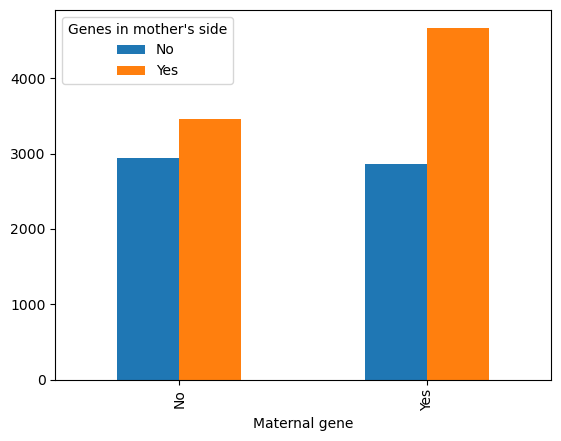

In [44]:
pd.crosstab(df['Maternal gene'], df["Genes in mother's side"]).plot(kind='bar')

In [45]:
pd.crosstab(df['Maternal gene'], df["Disorder Subclass"])

Disorder Subclass,Cystic fibrosis,Leigh syndrome,Mitochondrial myopathy,Tay-Sachs
Maternal gene,,,,
No,1081,2013,1941,1360
Yes,1946,2536,1916,1130


<Axes: xlabel='Maternal gene'>

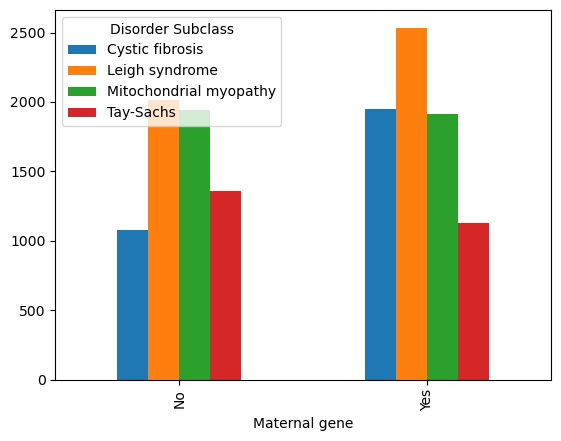

In [46]:
pd.crosstab(df['Maternal gene'], df["Disorder Subclass"]).plot(kind='bar')

Maternal gene    No   Yes
row_0                    
Symptom 1      6395  7528


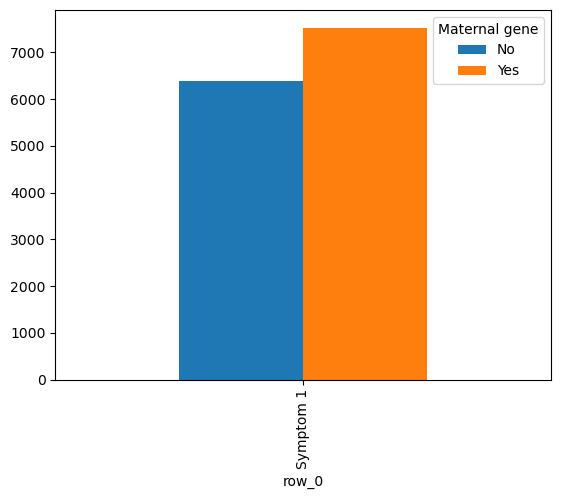

Maternal gene    No   Yes
row_0                    
Symptom 2      6395  7528


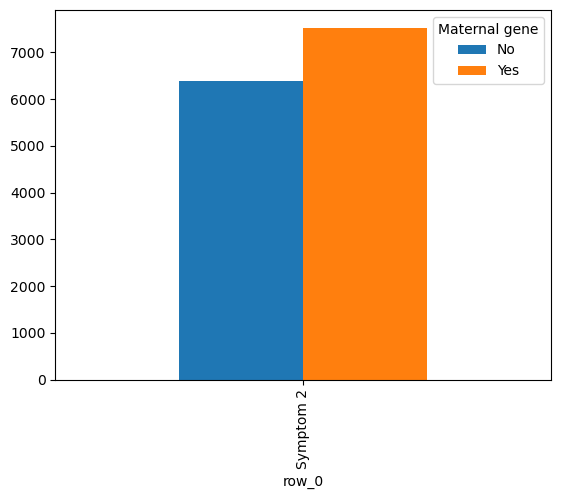

Maternal gene    No   Yes
row_0                    
Symptom 3      6395  7528


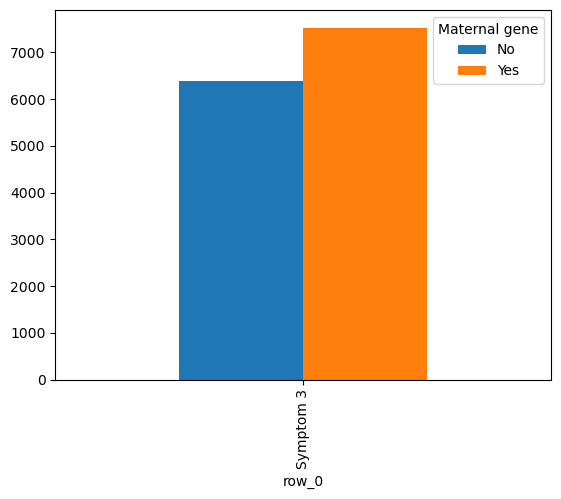

Maternal gene    No   Yes
row_0                    
Symptom 4      6395  7528


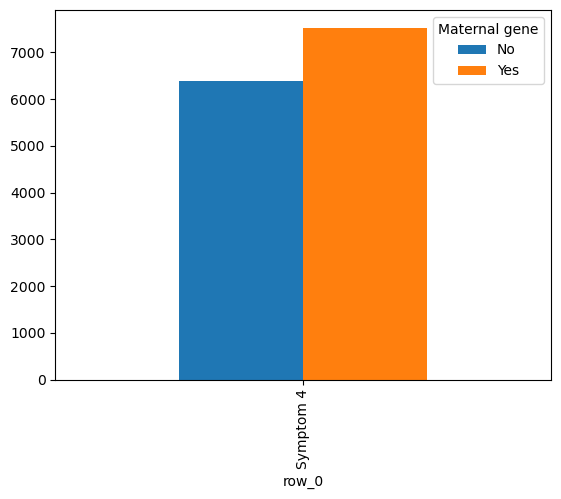

Maternal gene    No   Yes
row_0                    
Symptom 5      6395  7528


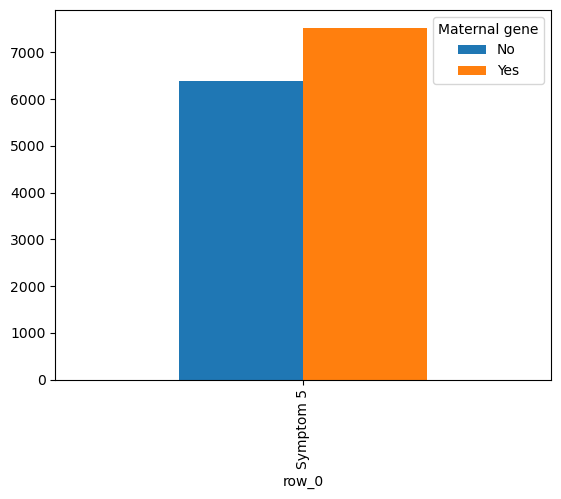

In [47]:
list=['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']
for col in list:
    print(pd.crosstab(col,df['Maternal gene']))
    pd.crosstab(col,df['Maternal gene']).plot(kind='bar')
    plt.show()

- Since.'Disorder subclass' is giving much clear information.Using 'Disorder subclass' for imputing missing values in 'Maternal gene'.

In [48]:
conditions = [
    df["Disorder Subclass"] == "Alzheimer's",
    df["Disorder Subclass"] == "Cancer",
    df["Disorder Subclass"] == "Cystic fibrosis",
    df["Disorder Subclass"] == "Diabetes",
    df["Disorder Subclass"] == "Hemochromatosis",
    df["Disorder Subclass"] == "Leber's hereditary optic neuropathy",
    df["Disorder Subclass"] == "Leigh syndrome",
    df["Disorder Subclass"] == "Mitochondrial myopathy",
    df["Disorder Subclass"] == "Tay-Sachs"
]

values = ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']

df["Maternal gene"] = df["Maternal gene"].fillna(pd.Series(np.select(conditions, values, default=None), index=df.index))


In [49]:
df['Maternal gene'].isnull().sum()

0

In [50]:
# NUMERIC FEATURES affecting the Maternal gene

In [51]:
p_mat_n=[]
for i in df.select_dtypes(include=np.number):
    print(i)
    result = stats.mannwhitneyu(df[i][df["Maternal gene"]=="Yes"],
                     df[i][df["Maternal gene"]=="No"])
                     

    p_value = result.pvalue
    p_mat_n.append(p_value)
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")


Patient Age
Fail to reject the null hypothesis. No significant difference.
Blood cell count (mcL)
Fail to reject the null hypothesis. No significant difference.
Mother's age
Fail to reject the null hypothesis. No significant difference.
Father's age
Fail to reject the null hypothesis. No significant difference.
No. of previous abortion
Fail to reject the null hypothesis. No significant difference.
White Blood cell count (thousand per microliter)
Fail to reject the null hypothesis. No significant difference.


In [52]:
p_value_mat_n=pd.DataFrame()
p_value_mat_n['Features']=df.select_dtypes(include=np.number).columns
p_value_mat_n['p_values']=p_mat_n

In [53]:
p_value_mat_n.sort_values(by='p_values',ascending=True)

,Features,p_values
1,Blood cell count (mcL),0.530886
0,Patient Age,NaN
2,Mother's age,NaN
3,Father's age,NaN
4,No. of previous abortion,NaN
5,White Blood cell count (thousand per microliter),NaN


**Filling Missing values in "Inherited from father" columns**

In [54]:
# categorical column affecting 'Inherited from father'

In [55]:
p_father=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df["Inherited from father"], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_father.append(round(p,2))
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("--------------------------------------------------------------------")
    

Genes in mother's side
Chi-squared statistic: 1.929560672186238
P-value: 0.1648065175762338
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
Inherited from father
Chi-squared statistic: 15628.77378281384
P-value: 0.0
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
Maternal gene
Chi-squared statistic: 2.982625003541197
P-value: 0.08416267184090537
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
Paternal gene
Chi-squared statistic: 116.8755166305567
P-value: 3.0566292551985187e-27
Reject the null hypothesis. There is a significant difference.
--------------------------------------------------------------------
Status
Chi-squared statistic: 0.9298138417507997
P-value: 0.33491130285406395
Fail to reject the null hypothesis. No significant diff

In [56]:
p_value_father=pd.DataFrame()
p_value_father['Features']=df.select_dtypes(exclude=np.number).columns
p_value_father['p_values']=p_father

In [57]:
p_value_father.sort_values(by='p_values',ascending=True)

,Features,p_values
24,Disorder Subclass,0.00
1,Inherited from father,0.00
3,Paternal gene,0.00
22,Symptom 4,0.00
21,Symptom 3,0.00
20,Symptom 2,0.00
19,Symptom 1,0.00
23,Symptom 5,0.00
2,Maternal gene,0.08
5,Respiratory Rate (breaths/min),0.09


- 'Disorder subclass','Petarnal' and 'Symptoms' are affecting 'Inherited from father' the most.

In [58]:
pd.crosstab(df["Inherited from father"], df["Disorder Subclass"])

Disorder Subclass,Cystic fibrosis,Leigh syndrome,Mitochondrial myopathy,Tay-Sachs
Inherited from father,,,,
No,1758,3050,2832,1986
Yes,1638,2046,1511,812


- All are having 'Inherited from father' as 'No' for each disorder subclass

<Axes: xlabel='Inherited from father'>

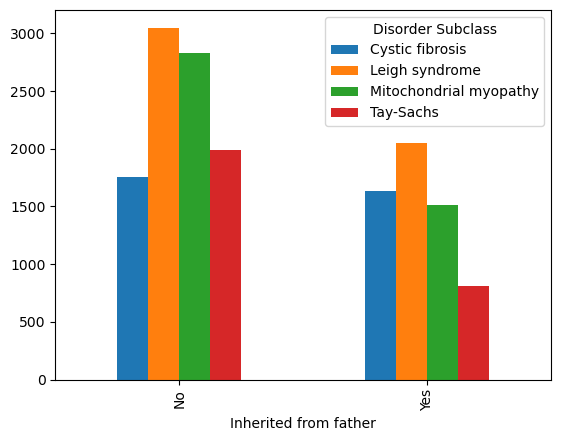

In [59]:
pd.crosstab(df["Inherited from father"], df["Disorder Subclass"]).plot(kind='bar')

In [60]:
pd.crosstab(df["Inherited from father"], df["Paternal gene"])

Paternal gene,No,Yes
Inherited from father,,
No,5894,3732
Yes,3150,2857


<Axes: xlabel='Inherited from father'>

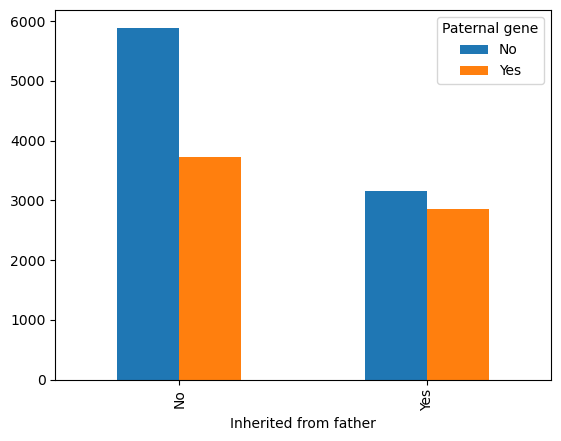

In [61]:
pd.crosstab(df["Inherited from father"], df["Paternal gene"]).plot(kind='bar')

- Even with respect to Paternal gene.It is giving 'No' in majority

Inherited from father    No   Yes
row_0                            
Symptom 1              9626  6007


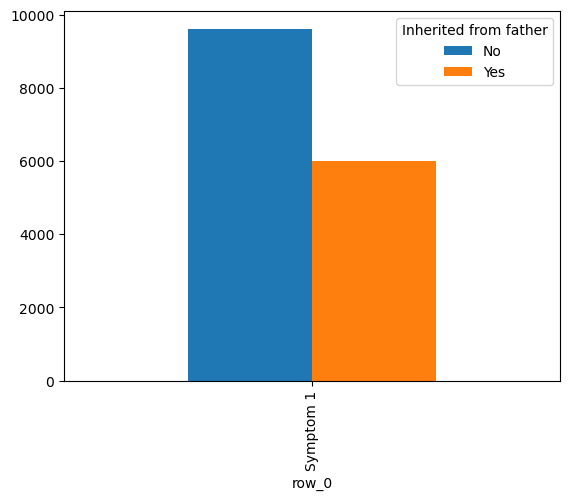

Inherited from father    No   Yes
row_0                            
Symptom 2              9626  6007


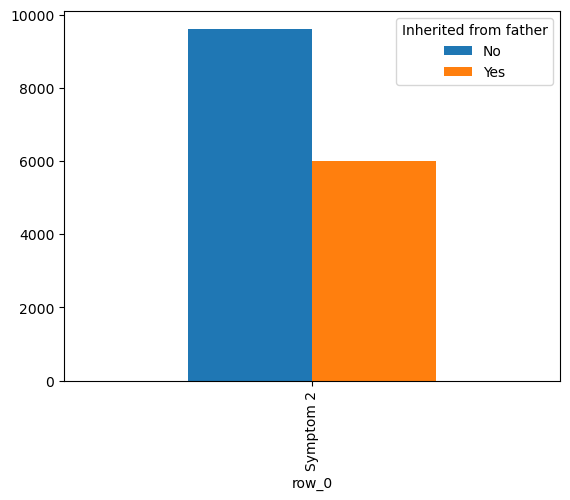

Inherited from father    No   Yes
row_0                            
Symptom 3              9626  6007


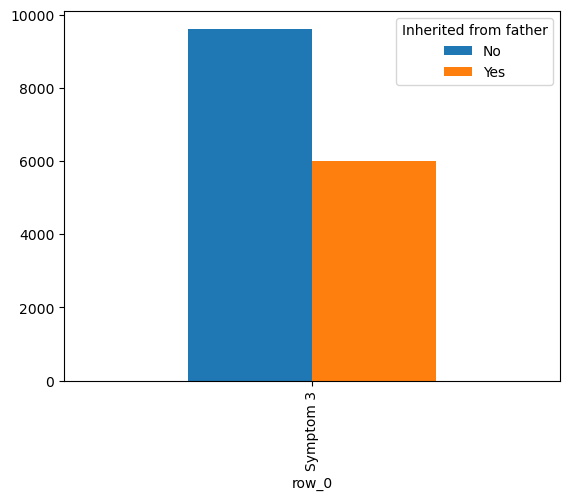

Inherited from father    No   Yes
row_0                            
Symptom 4              9626  6007


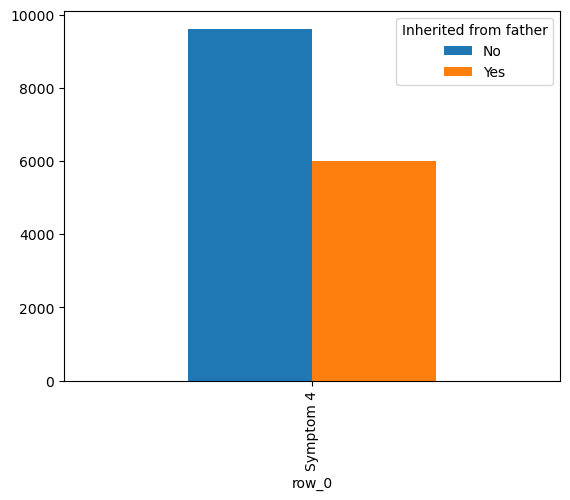

Inherited from father    No   Yes
row_0                            
Symptom 5              9626  6007


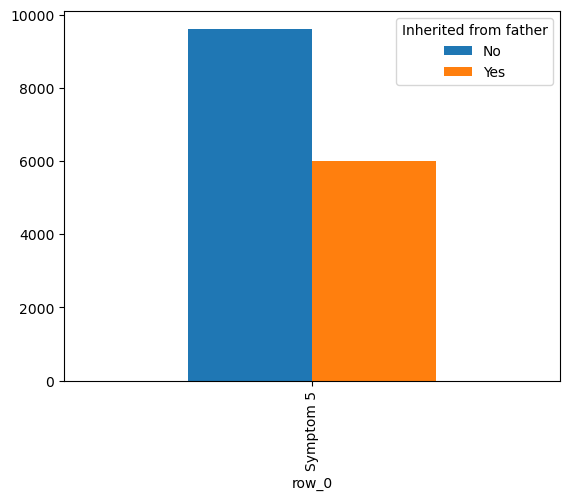

In [62]:
list=['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']
for col in list:
    print(pd.crosstab(col,df['Inherited from father']))
    pd.crosstab(col,df['Inherited from father']).plot(kind='bar')
    plt.show()

- 'No' is in Majority irrespective to any disorder suclass.

- Since,irerespective of any disorder subclass 'Inherited from father' is coming negative.Hence,we impute 'No' in all the missing values.

In [63]:

df["Inherited from father"] = df["Inherited from father"].fillna('No')

In [64]:
df["Inherited from father"].isnull().sum()

0

**Filling Missing values in "Blood test result"  column**

In [65]:
df["Blood test result"].value_counts()

slightly abnormal    3740
inconclusive         3576
normal               3575
abnormal             3463
Name: Blood test result, dtype: int64

In [66]:
#Numeric values affecting 'Blood test result'

In [67]:
p_bloodtest_n=[]
for i in df.select_dtypes(include=np.number):
    print(i)
    result = kruskal(df[i][df["Blood test result"]=="slightly abnormal"],
                     df[i][df["Blood test result"]=="inconclusive"],
                     df[i][df["Blood test result"]=="normal"],
                    df[i][df["Blood test result"]=="abnormal"])
                     

    p_value = result.pvalue
    p_bloodtest_n.append(p_value)
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")


Patient Age
Fail to reject the null hypothesis. No significant difference.
Blood cell count (mcL)
Fail to reject the null hypothesis. No significant difference.
Mother's age
Fail to reject the null hypothesis. No significant difference.
Father's age
Fail to reject the null hypothesis. No significant difference.
No. of previous abortion
Fail to reject the null hypothesis. No significant difference.
White Blood cell count (thousand per microliter)
Fail to reject the null hypothesis. No significant difference.


In [68]:
p_val_bloodtest_n=pd.DataFrame()
p_val_bloodtest_n['Features']=df.select_dtypes(include=np.number).columns
p_val_bloodtest_n['p_values']=p_bloodtest_n

In [69]:
p_val_bloodtest_n.sort_values(by='p_values',ascending=True)

,Features,p_values
1,Blood cell count (mcL),0.106437
0,Patient Age,NaN
2,Mother's age,NaN
3,Father's age,NaN
4,No. of previous abortion,NaN
5,White Blood cell count (thousand per microliter),NaN


In [70]:
# Categorical column affecting "Blood test result"

In [71]:
p_bloodtest=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df["Blood test result"], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_bloodtest.append(round(p,2))
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("--------------------------------------------------------------------")
    

Genes in mother's side
Chi-squared statistic: 7.091414364283558
P-value: 0.06904046329188772
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
Inherited from father
Chi-squared statistic: 3.7622191602956647
P-value: 0.28831136619057446
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
Maternal gene
Chi-squared statistic: 2.825979062370907
P-value: 0.41924113733481116
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
Paternal gene
Chi-squared statistic: 2.492252096394406
P-value: 0.47669293047297645
Fail to reject the null hypothesis. No significant difference.
--------------------------------------------------------------------
Status
Chi-squared statistic: 4.674180852841616
P-value: 0.1972700783918171
Fail to reject the null hypothesis. No sig

In [72]:
p_value_bloodtest_cat=pd.DataFrame()
p_value_bloodtest_cat['Features']=df.select_dtypes(exclude=np.number).columns
p_value_bloodtest_cat['p_values']=p_bloodtest

In [73]:
p_value_bloodtest_cat.sort_values(by='p_values',ascending=True)

,Features,p_values
18,Blood test result,0.00
22,Symptom 4,0.01
17,Birth defects,0.01
19,Symptom 1,0.03
24,Disorder Subclass,0.04
0,Genes in mother's side,0.07
13,H/O radiation exposure (x-ray),0.14
16,History of anomalies in previous pregnancies,0.15
4,Status,0.20
1,Inherited from father,0.29


"Symptom 1","Symptom 4",'Disorder Subclass','Birth defects' and 'History of anomalies in previous pregnancies' are affecting the most

- Among all 'Symptom4' is significantly affecting 'Blood_test_result

In [74]:
pd.crosstab(df['Symptom 4'],df['Blood test result'])

Blood test result,abnormal,inconclusive,normal,slightly abnormal
Symptom 4,,,,
0.0,1600,1780,1698,1806
1.0,1592,1496,1525,1617


<Axes: xlabel='Symptom 4'>

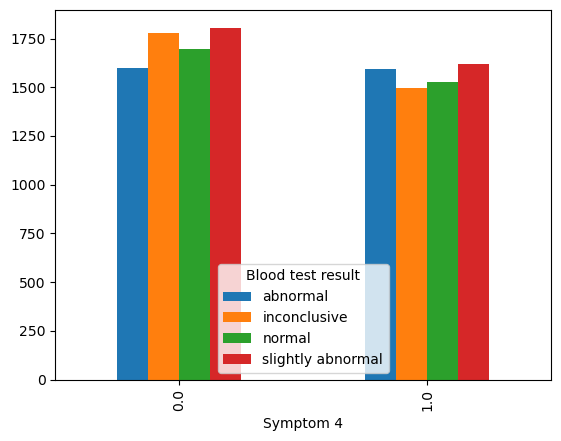

In [75]:
pd.crosstab(df['Symptom 4'],df['Blood test result']).plot(kind='bar')

In [76]:
pd.crosstab(df['Birth defects'],df['Blood test result'])

Blood test result,abnormal,inconclusive,normal,slightly abnormal
Birth defects,,,,
Multiple,1500,1676,1610,1755
Singular,1636,1581,1649,1674


<Axes: xlabel='Birth defects'>

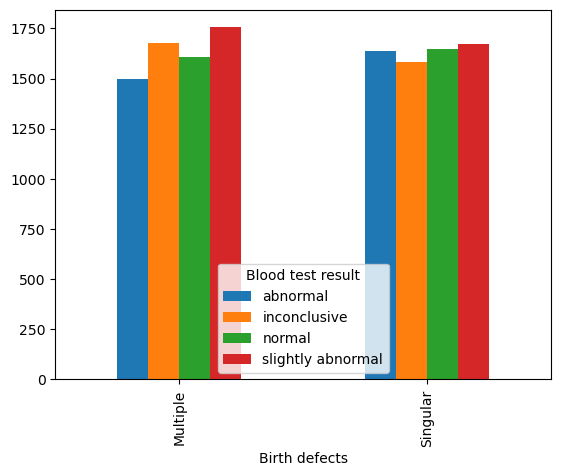

In [77]:
pd.crosstab(df['Birth defects'],df['Blood test result']).plot(kind='bar')

- For both "Birth defects" and "Symptom 4",irrespective of "Blood test results",it is giving "slightly abnormal".

In [78]:

df["Blood test result"] = df["Blood test result"].fillna("slightly abnormal")


In [79]:
df['Blood test result'].isnull().sum()

0

**Missing Missing values of Insignificant Columns w.r.t Target using Central tendencies**

In [80]:
#Numerical
for col in df.select_dtypes(np.number).columns:
    df[col]=df[col].fillna(df[col].mean())

In [81]:
df['Symptom 1'].dtype

dtype('O')

In [82]:
#Categorical
df_cat=df.drop(["Genes in mother's side",'Inherited from father','Maternal gene', 'Paternal gene','Blood test result',
       'Disorder Subclass'],axis=1)
for col in df_cat.select_dtypes(exclude=np.number).columns:
    df[col]=df[col].fillna(df[col].mode()[0])

In [83]:
df.dtypes

Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Mother's age                                        float64
Father's age                                        float64
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                                object
Follow-up                                            object
Gender                                               object
Birth asphyxia                                       object
Autopsy shows birth defect (if applicable)           object
Folic acid details (peri-conceptional)               object
H/O serious maternal illness            

In [84]:
l=['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']
for sym in l:
    df[sym]=df[sym].astype('object')

# Outliers Treatment

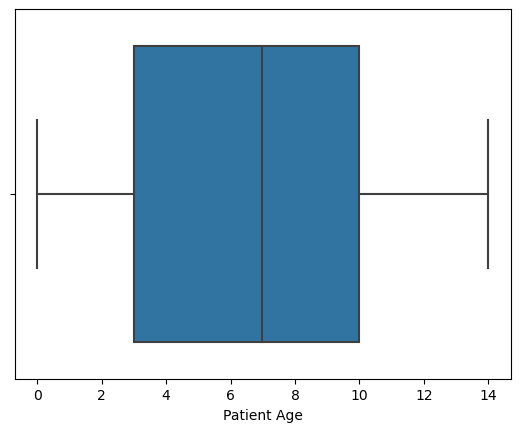

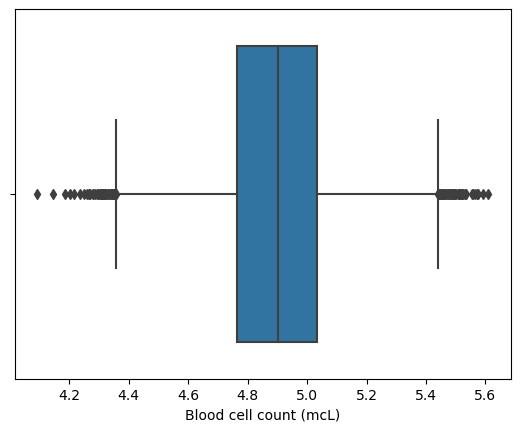

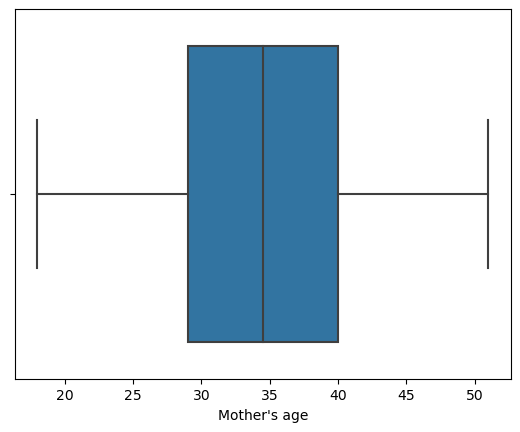

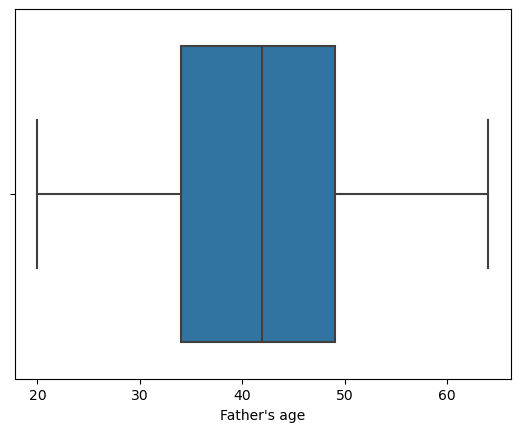

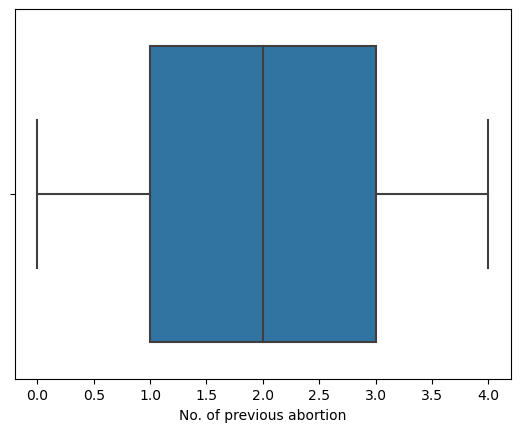

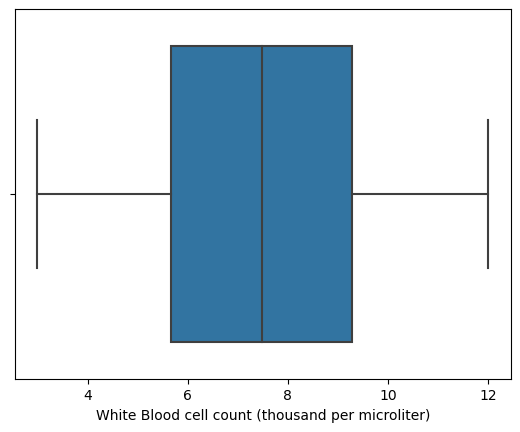

In [85]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])
    plt.show()

- We have missing values in only "Blood cell count(mcL)" but that is not too extreme.So,we can ignore.

# Encoding

- We are using One-hot encoding so that equal importance can be given for each subcategory.

In [86]:
df1=pd.get_dummies(df,drop_first=True)

C:\Users\slch6\AppData\Local\Temp\ipykernel_19520\1057537446.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1=pd.get_dummies(df,drop_first=True)
C:\Users\slch6\AppData\Local\Temp\ipykernel_19520\1057537446.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1=pd.get_dummies(df,drop_first=True)
C:\Users\slch6\AppData\Local\Temp\ipykernel_19520\1057537446.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1=pd.get_dummies(df,drop_first=True)
C:\Users\slch6\AppData\Local\Temp\ipykernel_19520\1057537446.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1=pd.

In [87]:
df1.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,...,Blood test result_normal,Blood test result_slightly abnormal,Symptom 1_1.0,Symptom 2_1.0,Symptom 3_1.0,Symptom 4_1.0,Symptom 5_1.0,Disorder Subclass_Leigh syndrome,Disorder Subclass_Mitochondrial myopathy,Disorder Subclass_Tay-Sachs
Patient Id,,,,,,,,,,,,,,,,,,,,,
PID0x25d5,4.0,4.910669,34.50773,23.000000,2.004443,5.522560,1,1,0,0,...,1,0,1,1,1,1,0,0,0,0
PID0x4ac8,12.0,4.705280,21.00000,41.890791,1.000000,7.919321,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
PID0x44fe,14.0,5.103188,34.50773,41.890791,0.000000,10.272230,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
PID0x28de,3.0,4.901080,34.50773,63.000000,3.000000,6.825974,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
PID0x4f8f,3.0,4.964816,40.00000,41.890791,1.000000,9.836351,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1


In [88]:
df1.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)',
       'Genes in mother's side_Yes', 'Inherited from father_Yes',
       'Maternal gene_Yes', 'Paternal gene_Yes', 'Status_Deceased',
       'Respiratory Rate (breaths/min)_Tachypnea',
       'Heart Rate (rates/min_Tachycardia', 'Follow-up_Low', 'Gender_Female',
       'Gender_Male', 'Birth asphyxia_No record', 'Birth asphyxia_Yes',
       'Autopsy shows birth defect (if applicable)_Not applicable',
       'Autopsy shows birth defect (if applicable)_Yes',
       'Folic acid details (peri-conceptional)_Yes',
       'H/O serious maternal illness_Yes',
       'H/O radiation exposure (x-ray)_Not applicable',
       'H/O radiation exposure (x-ray)_Yes',
       'H/O substance abuse_Not applicable', 'H/O substance abuse_Yes',
       'Assisted conception IVF/ART_Yes',
       'History of anomalies in previous pregnancies_Ye

# Scaling

In [89]:

for column in df1.select_dtypes(include=np.number).columns:
    scaler = RobustScaler()
    df1[column] = scaler.fit_transform(df1[[column]])

data_sc = pd.DataFrame(df1, columns=df1.columns)

In [90]:
data_sc

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,...,Blood test result_normal,Blood test result_slightly abnormal,Symptom 1_1.0,Symptom 2_1.0,Symptom 3_1.0,Symptom 4_1.0,Symptom 5_1.0,Disorder Subclass_Leigh syndrome,Disorder Subclass_Mitochondrial myopathy,Disorder Subclass_Tay-Sachs
Patient Id,,,,,,,,,,,,,,,,,,,,,
PID0x25d5,-0.424631,0.035826,0.000000,-1.259386,0.002221,-0.543182,0.0,1.0,-1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
PID0x4ac8,0.718226,-0.723457,-1.227975,0.000000,-0.500000,0.121258,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
PID0x44fe,1.003940,0.747534,0.000000,0.000000,-1.000000,0.773540,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0
PID0x28de,-0.567488,0.000376,0.000000,1.407281,0.500000,-0.181844,0.0,0.0,0.0,1.0,...,1.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0
PID0x4f8f,-0.567488,0.235997,0.499297,0.000000,-0.500000,0.652704,-1.0,0.0,0.0,1.0,...,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PID0x26b4,-0.996060,0.113787,0.000000,0.540614,-0.500000,1.155228,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0
PID0x3656,0.289655,0.412641,1.135661,0.000000,0.002221,1.252519,-1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0
PID0x5598,-0.424631,1.320946,0.044752,1.473947,0.500000,-0.248700,0.0,1.0,0.0,0.0,...,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Base Model Building

**Logistic Regression**

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [92]:
data_sc.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)',
       'Genes in mother's side_Yes', 'Inherited from father_Yes',
       'Maternal gene_Yes', 'Paternal gene_Yes', 'Status_Deceased',
       'Respiratory Rate (breaths/min)_Tachypnea',
       'Heart Rate (rates/min_Tachycardia', 'Follow-up_Low', 'Gender_Female',
       'Gender_Male', 'Birth asphyxia_No record', 'Birth asphyxia_Yes',
       'Autopsy shows birth defect (if applicable)_Not applicable',
       'Autopsy shows birth defect (if applicable)_Yes',
       'Folic acid details (peri-conceptional)_Yes',
       'H/O serious maternal illness_Yes',
       'H/O radiation exposure (x-ray)_Not applicable',
       'H/O radiation exposure (x-ray)_Yes',
       'H/O substance abuse_Not applicable', 'H/O substance abuse_Yes',
       'Assisted conception IVF/ART_Yes',
       'History of anomalies in previous pregnancies_Ye

In [93]:
def metrics(ytest,ypred):
    print("The Accuracy_score: ",accuracy_score(ytest,ypred))
    print("The precision_score: ",precision_score(ytest,ypred))
    print("The recall_score: ",recall_score(ytest,ypred))
    print("The f1 score : ",f1_score(ytest,ypred))
    print("The Classification_report : ")
    print(classification_report(ytest,ypred))
    print("The roc_auc_score: ",roc_auc_score(ytest,ypred))
    fpr,tpr,thre=roc_curve(ytest,ypred)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='red')
    plt.show()

**Target with all the features and all 3 disorder subclasses**

**@'Disorder Subclass_Leigh syndrome' as a target column**

In [94]:
df2=data_sc.drop(['Disorder Subclass_Mitochondrial myopathy','Disorder Subclass_Tay-Sachs'],axis=1)
X=df2.drop('Disorder Subclass_Leigh syndrome',axis=1)
y=df2[['Disorder Subclass_Leigh syndrome']]

In [95]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [96]:
xtrain_c=sm.add_constant(xtrain)
lr=LogisticRegression()
base_model1=lr.fit(xtrain,ytrain)
ypred=base_model1.predict(xtest)

C:\Users\slch6\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Accuracy_score:  0.6741544674406865
The precision_score:  0.0
The recall_score:  0.0
The f1 score :  0.0
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.81      2672
         1.0       0.00      0.00      0.00      1290

    accuracy                           0.67      3962
   macro avg       0.34      0.50      0.40      3962
weighted avg       0.45      0.67      0.54      3962

The roc_auc_score:  0.499812874251497


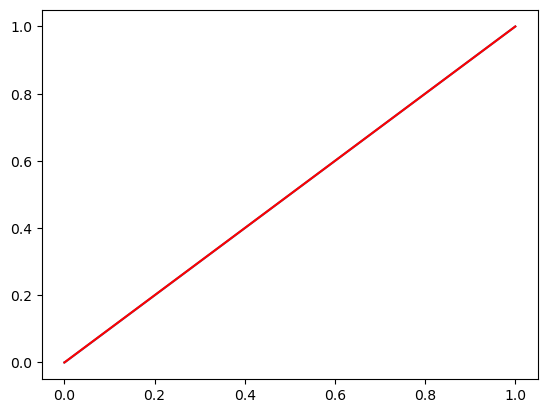

In [97]:
metrics(ytest,ypred)

- Inference:
- 'precision','recall' and 'f1_Score' for '1' is coming to be 0.
- 'precision','recall' and 'f1_Score' for '0' is coming to the range 0.67-1.00.
- The roc_curve of the model is lieing exactly on the diagonal.
- Proving that it is a worst Model.

**@  'Disorder Subclass_Mitochondrial myopathy' as a Target column**

In [98]:
df2=data_sc.drop(['Disorder Subclass_Leigh syndrome','Disorder Subclass_Tay-Sachs'],axis=1)
X=df2.drop('Disorder Subclass_Mitochondrial myopathy',axis=1)
y=df2[['Disorder Subclass_Mitochondrial myopathy']]

In [99]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [100]:
xtrain_c=sm.add_constant(xtrain)
lr=LogisticRegression()
base_model1=lr.fit(xtrain,ytrain)
ypred=base_model1.predict(xtest)

C:\Users\slch6\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Accuracy_score:  0.7062089853609288
The precision_score:  0.3648068669527897
The recall_score:  0.07720254314259764
The f1 score :  0.12743628185907047
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.73      0.95      0.82      2861
         1.0       0.36      0.08      0.13      1101

    accuracy                           0.71      3962
   macro avg       0.55      0.51      0.48      3962
weighted avg       0.63      0.71      0.63      3962

The roc_auc_score:  0.5127361894321866


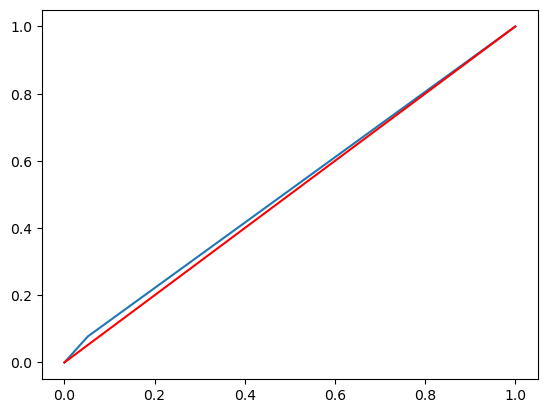

In [101]:
metrics(ytest,ypred)

- Inference:
- The 'Recall','Precision','f1-score' of 0 is in the range between 0.73-0.95.
- The 'Recall','Precision','f1-score' of 1 is in the range 0.08-0.36.
- roc_curve is lying almost on the diagonal.Represent the outcome as a by-chance result.
- This is also a worst model.

**@ 'Disorder Subclass_Tay-Sachs' as a Target column**

In [102]:
df2=data_sc.drop(['Disorder Subclass_Leigh syndrome','Disorder Subclass_Mitochondrial myopathy'],axis=1)
X=df2.drop('Disorder Subclass_Tay-Sachs',axis=1)
y=df2[['Disorder Subclass_Tay-Sachs']]

In [103]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [104]:
xtrain_c=sm.add_constant(xtrain)
lr=LogisticRegression()
base_model1=lr.fit(xtrain,ytrain)
ypred=base_model1.predict(xtest)

C:\Users\slch6\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Accuracy_score:  0.8384654215042907
The precision_score:  0.596045197740113
The recall_score:  0.2980225988700565
The f1 score :  0.3973634651600753
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      3254
         1.0       0.60      0.30      0.40       708

    accuracy                           0.84      3962
   macro avg       0.73      0.63      0.65      3962
weighted avg       0.81      0.84      0.82      3962

The roc_auc_score:  0.6270383430736268


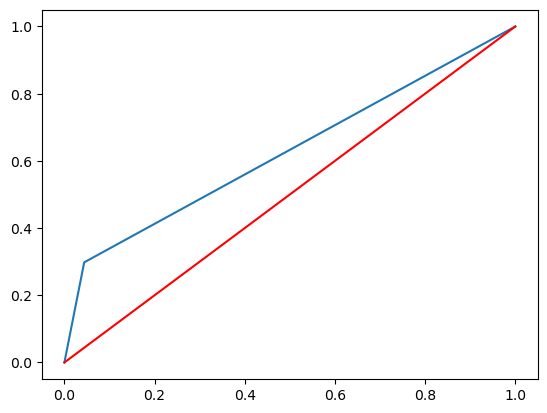

In [105]:
metrics(ytest,ypred)

- Inference:
- The 'Recall','Precision','f1-score' of 0 is in the range between 0.86-0.96.
- The 'Recall','Precision','f1-score' of 1 is in the range 0.30-0.60.
- roc_curve is lying almost on the diagonal.Represent the outcome as a by-chance result.
- This is also a worst model.

- Since,the performance is very very less.We will include only significant columns.

**Decision Tree (Without Hyperparameter Tuning)**

In [106]:
#'Disorder Subclass_Mitochondrial myopathy' as Target

In [107]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts() #Imbalanced

0.0    11441
1.0     4405
Name: Disorder Subclass_Mitochondrial myopathy, dtype: int64

In [108]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Mitochondrial myopathy']]

In [109]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [110]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

The Accuracy_score:  0.6360424028268551
The precision_score:  0.3497797356828194
The recall_score:  0.3605812897366031
The f1 score :  0.3550983899821109
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75      2861
         1.0       0.35      0.36      0.36      1101

    accuracy                           0.64      3962
   macro avg       0.55      0.55      0.55      3962
weighted avg       0.64      0.64      0.64      3962

The roc_auc_score:  0.5513147623097556


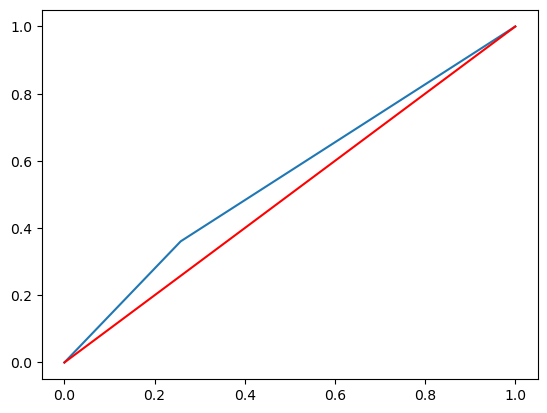

In [111]:
metrics(ytest,ypred)

- Inference:
- 'precision','recall' and 'f1_Score' for '1' is coming around 0.36-0.37.
- 'precision','recall' and 'f1_Score' for '0' is coming to 0.75.
- The roc_curve of the model is lieing little above the diagonal.
- Proving that it better than base model with all the Features.

In [112]:
# 'Disorder Subclass_Leigh syndrome' as Target.

In [113]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

0.0    10686
1.0     5160
Name: Disorder Subclass_Leigh syndrome, dtype: int64

In [114]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Leigh syndrome']]

In [115]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [116]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

The Accuracy_score:  0.5971731448763251
The precision_score:  0.38266871165644173
The recall_score:  0.3868217054263566
The f1 score :  0.3847340015420201
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70      2672
         1.0       0.38      0.39      0.38      1290

    accuracy                           0.60      3962
   macro avg       0.54      0.54      0.54      3962
weighted avg       0.60      0.60      0.60      3962

The roc_auc_score:  0.5427746251682681


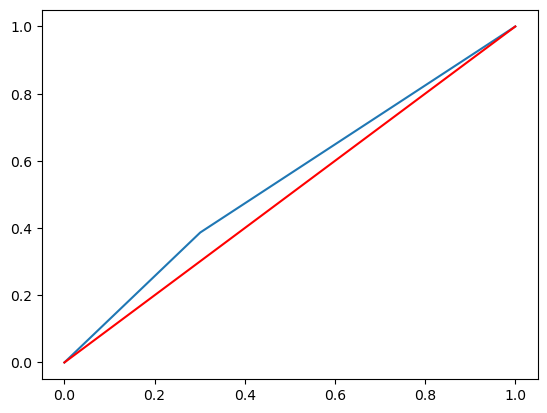

In [117]:
metrics(ytest,ypred)

- Inference:
- 'precision','recall' and 'f1_Score' for '1' is coming around 0.39-0.40.
- 'precision','recall' and 'f1_Score' for '0' is coming to 0.70.
- The roc_curve of the model is lieing little above the diagonal.
- Proving that it better than base model with all the Features.


In [118]:
#'Disorder Subclass_Tay-Sachs' as Target

In [119]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

0.0    13013
1.0     2833
Name: Disorder Subclass_Tay-Sachs, dtype: int64

In [120]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Tay-Sachs']]

In [121]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [122]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

The Accuracy_score:  0.7695608278647148
The precision_score:  0.3578363384188627
The recall_score:  0.3644067796610169
The f1 score :  0.3610916724982505
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3254
         1.0       0.36      0.36      0.36       708

    accuracy                           0.77      3962
   macro avg       0.61      0.61      0.61      3962
weighted avg       0.77      0.77      0.77      3962

The roc_auc_score:  0.6110601814715656


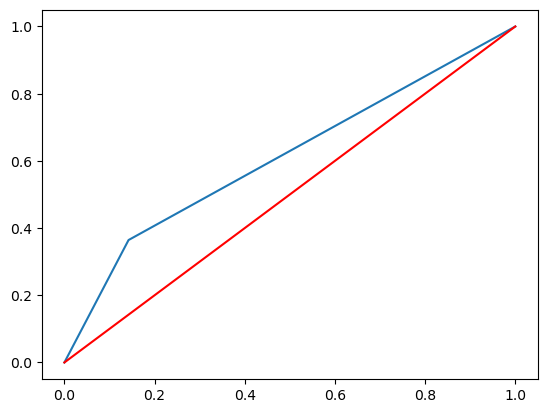

In [123]:
metrics(ytest,ypred)

- Inference:
- 'precision','recall' and 'f1_Score' for '1' is coming around 0.36.
- 'precision','recall' and 'f1_Score' for '0' is coming to 0.86.
- The roc_curve of the model is lieing little above the diagonal.
- Proving that it better than base model with all the Features.

**DecisionTree (with Hyperparameter tuning)**

In [124]:
#'Disorder Subclass_Mitochondrial myopathy' as Target

- Using Class_weights and threshold

In [125]:
#Class weights introduced based on frequency of Target.
#Threshold using yoden_index

In [126]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

0.0    11441
1.0     4405
Name: Disorder Subclass_Mitochondrial myopathy, dtype: int64

In [127]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Mitochondrial myopathy']]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
class_weights = {0:4405/11441, 1:11441/4405}

- Using GridSearchCv to select Parameters

In [128]:
dt=DecisionTreeClassifier()
params={'criterion':['entropy','gini'],
       'min_samples_split':range(5,100,50),
       'min_samples_leaf':range(5,150,50)}
grd=GridSearchCV(estimator=dt,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': range(5, 150, 50),
                         'min_samples_split': range(5, 100, 50)})

In [129]:
grd.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 105, 'min_samples_split': 5}

The Accuracy_score:  0.4573447753659768
The precision_score:  0.33216
The recall_score:  0.9427792915531336
The f1 score :  0.4912446758163749
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.92      0.27      0.42      2861
         1.0       0.33      0.94      0.49      1101

    accuracy                           0.46      3962
   macro avg       0.63      0.61      0.45      3962
weighted avg       0.76      0.46      0.44      3962

The roc_auc_score:  0.6066570348013833


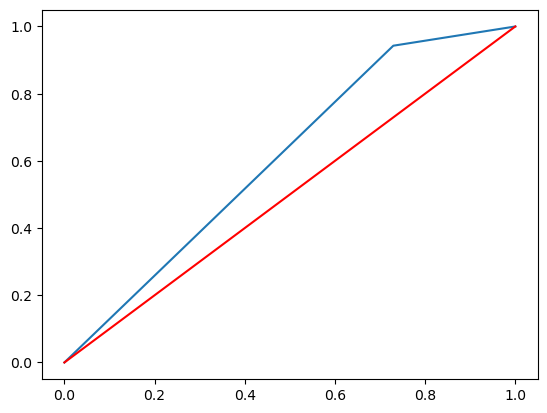

In [130]:
dt=DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf=105, min_samples_split= 5,class_weight=class_weights)
model_dt_tu=dt.fit(xtrain,ytrain)
y_probabilities = model_dt_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [131]:
## 'Disorder Subclass_Leigh syndrome' as Target.

In [132]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

0.0    10686
1.0     5160
Name: Disorder Subclass_Leigh syndrome, dtype: int64

In [133]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Leigh syndrome']]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
class_weights = {0:5160/10686, 1:10686/5160}

In [134]:
dt=DecisionTreeClassifier()
params={'criterion':['entropy','gini'],
       'min_samples_split':range(5,100,50),
       'min_samples_leaf':range(5,150,50)}
grd=GridSearchCV(estimator=dt,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': range(5, 150, 50),
                         'min_samples_split': range(5, 100, 50)})

In [135]:
grd.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 105, 'min_samples_split': 5}

The Accuracy_score:  0.4323573952549218
The precision_score:  0.35876288659793815
The recall_score:  0.9441860465116279
The f1 score :  0.519957310565635
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.87      0.19      0.31      2672
         1.0       0.36      0.94      0.52      1290

    accuracy                           0.43      3962
   macro avg       0.62      0.56      0.41      3962
weighted avg       0.71      0.43      0.38      3962

The roc_auc_score:  0.564720268764796


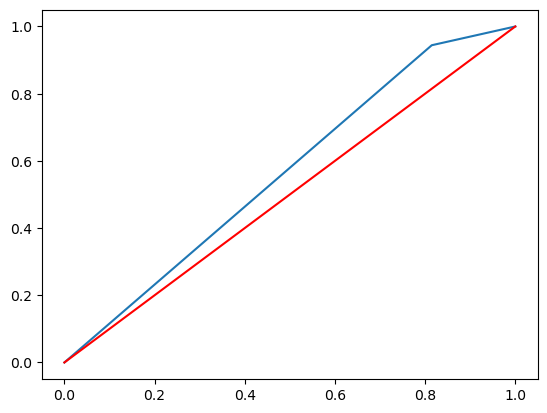

In [136]:
dt=DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf=105, min_samples_split= 5,class_weight=class_weights)
model_dt_tu=dt.fit(xtrain,ytrain)
y_probabilities = model_dt_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [137]:
#'Disorder Subclass_Tay-Sachs' as Target

In [138]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

0.0    13013
1.0     2833
Name: Disorder Subclass_Tay-Sachs, dtype: int64

In [139]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Tay-Sachs']]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
class_weights = {0:5160/10686, 1:10686/5160}

In [140]:
dt=DecisionTreeClassifier()
params={'criterion':['entropy','gini'],
       'min_samples_split':range(5,100,50),
       'min_samples_leaf':range(5,150,50)}
grd=GridSearchCV(estimator=dt,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': range(5, 150, 50),
                         'min_samples_split': range(5, 100, 50)})

In [141]:
grd.best_params_

{'criterion': 'gini', 'min_samples_leaf': 105, 'min_samples_split': 5}

The Accuracy_score:  0.7145381120646138
The precision_score:  0.3603960396039604
The recall_score:  0.7711864406779662
The f1 score :  0.49122807017543857
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80      3254
         1.0       0.36      0.77      0.49       708

    accuracy                           0.71      3962
   macro avg       0.65      0.74      0.65      3962
weighted avg       0.83      0.71      0.75      3962

The roc_auc_score:  0.7366995510089278


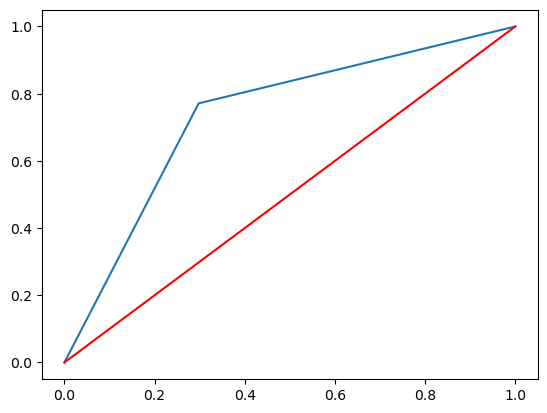

In [142]:
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_leaf=105, min_samples_split= 5,class_weight=class_weights)
model_dt_tu=dt.fit(xtrain,ytrain)
y_probabilities = model_dt_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

**RandomForest Classifier(without Hyperparameter Tuning)**

In [143]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [144]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

0.0    11441
1.0     4405
Name: Disorder Subclass_Mitochondrial myopathy, dtype: int64

In [145]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
rf=RandomForestClassifier()
model_rf=rf.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

The Accuracy_score:  0.5827864714790509
The precision_score:  0.1
The recall_score:  0.06267029972752043
The f1 score :  0.07705192629815745
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.68      0.78      0.73      2861
         1.0       0.10      0.06      0.08      1101

    accuracy                           0.58      3962
   macro avg       0.39      0.42      0.40      3962
weighted avg       0.52      0.58      0.55      3962

The roc_auc_score:  0.42280666332059347


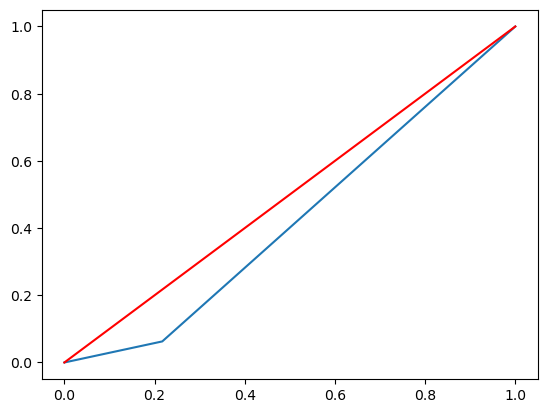

In [146]:
metrics(ytest,ypred)

In [147]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [148]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

0.0    10686
1.0     5160
Name: Disorder Subclass_Leigh syndrome, dtype: int64

In [149]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
rf=RandomForestClassifier()
model_rf=rf.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

The Accuracy_score:  0.5184250378596669
The precision_score:  0.05982905982905983
The recall_score:  0.03255813953488372
The f1 score :  0.042168674698795185
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.62      0.75      0.68      2672
         1.0       0.06      0.03      0.04      1290

    accuracy                           0.52      3962
   macro avg       0.34      0.39      0.36      3962
weighted avg       0.44      0.52      0.47      3962

The roc_auc_score:  0.3927760757554658


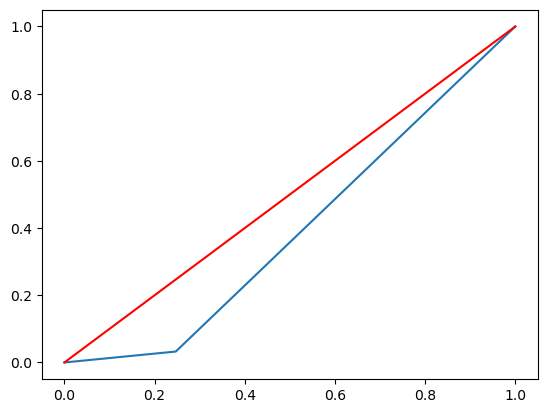

In [150]:
metrics(ytest,ypred)

In [151]:
#'Disorder Subclass_Tay-Sachs' as Target

In [152]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

0.0    13013
1.0     2833
Name: Disorder Subclass_Tay-Sachs, dtype: int64

In [153]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
rf=RandomForestClassifier()
model_rf=rf.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

The Accuracy_score:  0.7695608278647148
The precision_score:  0.3578363384188627
The recall_score:  0.3644067796610169
The f1 score :  0.3610916724982505
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3254
         1.0       0.36      0.36      0.36       708

    accuracy                           0.77      3962
   macro avg       0.61      0.61      0.61      3962
weighted avg       0.77      0.77      0.77      3962

The roc_auc_score:  0.6110601814715656


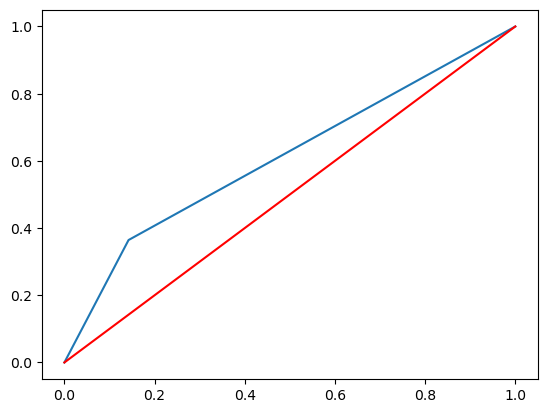

In [154]:
metrics(ytest,ypred)

**RandomForestClassifier(using Hyperparameter Tuning)**

In [155]:
#'Disorder Subclass_Mitochondrial myopathy' as Target

In [156]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

0.0    11441
1.0     4405
Name: Disorder Subclass_Mitochondrial myopathy, dtype: int64

In [290]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain_mm,xtest_mm,ytrain_mm,ytest_mm=train_test_split(X,y,stratify=y,random_state=1)

In [158]:
class_weights = {0:4405/11441, 1:11441/4405}
rf = RandomForestClassifier()
params={'criterion':['entropy','gini'],
       'n_estimators':[90,95,100],
       'max_depth':[5,7,10],
       'min_samples_split':[2,3,5]}
grd=GridSearchCV(estimator=rf,param_grid=params)
grd.fit(xtrain_mm,ytrain_mm)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 7, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [90, 95, 100]})

In [159]:
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

The Accuracy_score:  0.4114083796062595
The precision_score:  0.3188107153370621
The recall_score:  0.9836512261580381
The f1 score :  0.4815473543797243
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.97      0.19      0.32      2861
         1.0       0.32      0.98      0.48      1101

    accuracy                           0.41      3962
   macro avg       0.64      0.59      0.40      3962
weighted avg       0.79      0.41      0.36      3962

The roc_auc_score:  0.5874215585526297


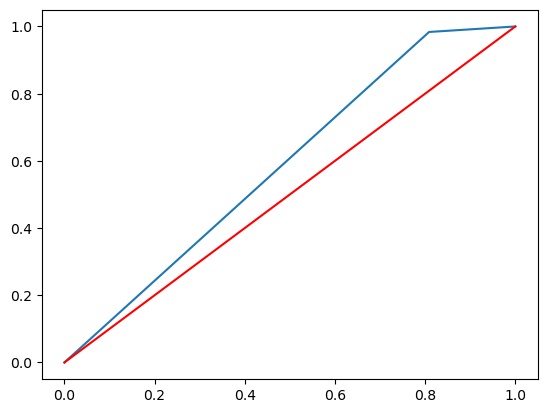

In [291]:
class_weights = {0:4405/11441, 1:11441/4405}
rf = RandomForestClassifier()
rf=RandomForestClassifier(criterion='gini',
 max_depth= 7,
 min_samples_split= 3,
 n_estimators= 90,
 class_weight=class_weights)
model_rf_tu_mm=rf.fit(xtrain_mm,ytrain_mm)
y_probabilities = model_rf_tu_mm.predict_proba(xtest_mm)[:, 1]
custom_threshold = 0.50
ypred_mitochondrial_myopathy = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest_mm,ypred_mitochondrial_myopathy)

In [161]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [162]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

0.0    10686
1.0     5160
Name: Disorder Subclass_Leigh syndrome, dtype: int64

In [292]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain_ls,xtest_ls,ytrain_ls,ytest_ls=train_test_split(X,y,stratify=y,random_state=1)

In [164]:
class_weights = {0:5160/10686, 1:10686/5160}
rf = RandomForestClassifier()
params={'criterion':['entropy','gini'],
       'n_estimators':[90,95,100],
       'max_depth':[5,7,10],
       'min_samples_split':[2,3,5]}
grd=GridSearchCV(estimator=rf,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 7, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [90, 95, 100]})

In [165]:
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 90}

The Accuracy_score:  0.48889449772842
The precision_score:  0.3788328387734916
The recall_score:  0.8906976744186047
The f1 score :  0.5315752949340735
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.85      0.29      0.44      2672
         1.0       0.38      0.89      0.53      1290

    accuracy                           0.49      3962
   macro avg       0.61      0.59      0.48      3962
weighted avg       0.70      0.49      0.47      3962

The roc_auc_score:  0.5928039270296617


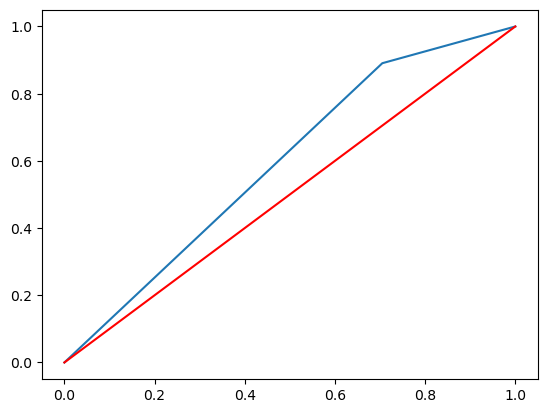

In [293]:
class_weights = {0:5160/10686, 1:10686/5160}

rf=RandomForestClassifier(criterion='entropy',
 max_depth= 10,
 min_samples_split= 5,
 n_estimators= 95,
 class_weight=class_weights)
model_rf_tu_ls=rf.fit(xtrain_ls,ytrain_ls)
y_probabilities = model_rf_tu_ls.predict_proba(xtest_ls)[:, 1]
custom_threshold = 0.50
ypred_leigh_syndrome= (y_probabilities >= custom_threshold).astype(int)
metrics(ytest_ls,ypred_leigh_syndrome)

In [167]:
#'Disorder Subclass_Tay-Sachs' as Target

In [168]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

0.0    13013
1.0     2833
Name: Disorder Subclass_Tay-Sachs, dtype: int64

In [294]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain_ts,xtest_ts,ytrain_ts,ytest_ts=train_test_split(X,y,stratify=y,random_state=1)

In [170]:
class_weights = {0:2833/13013, 1:13013/2833}
rf = RandomForestClassifier()
params={'criterion':['entropy','gini'],
       'n_estimators':[90,95,100],
       'max_depth':[5,7,10],
       'min_samples_split':[2,3,5]}
grd=GridSearchCV(estimator=rf,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 7, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [90, 95, 100]})

In [171]:
grd.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 3,
 'n_estimators': 95}

The Accuracy_score:  0.6224129227662797
The precision_score:  0.3079922027290448
The recall_score:  0.8926553672316384
The f1 score :  0.4579710144927537
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.96      0.56      0.71      3254
         1.0       0.31      0.89      0.46       708

    accuracy                           0.62      3962
   macro avg       0.63      0.73      0.58      3962
weighted avg       0.84      0.62      0.67      3962

The roc_auc_score:  0.7281346903767288


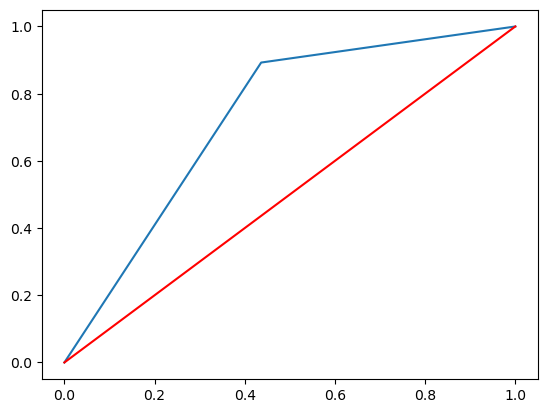

In [295]:
class_weights = {0:2833/13013, 1:13013/2833}
rf=RandomForestClassifier(criterion='gini',
 max_depth= 10,
 min_samples_split= 3,
 n_estimators= 100,
 class_weight=class_weights)
model_rf_tu_ts=rf.fit(xtrain_ts,ytrain_ts)
y_probabilities = model_rf_tu_ts.predict_proba(xtest_ts)[:, 1]
custom_threshold = 0.50
ypred_Tay_Sachs = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest_ts,ypred_Tay_Sachs)

**AdaboostClassifier(Without Hyperparameter Tuning)**

In [173]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [174]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
ada=AdaBoostClassifier()
model_ada=ada.fit(xtrain,ytrain)
ypred=model_ada.predict(xtest)

The Accuracy_score:  0.7026754164563351
The precision_score:  0.35135135135135137
The recall_score:  0.08265213442325159
The f1 score :  0.1338235294117647
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.73      0.94      0.82      2861
         1.0       0.35      0.08      0.13      1101

    accuracy                           0.70      3962
   macro avg       0.54      0.51      0.48      3962
weighted avg       0.62      0.70      0.63      3962

The roc_auc_score:  0.5119657037023633


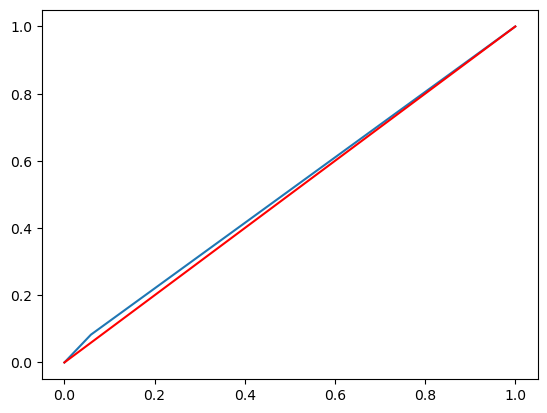

In [175]:
metrics(ytest,ypred)

In [176]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [177]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
ada=AdaBoostClassifier()
model_ada=ada.fit(xtrain,ytrain)
ypred=model_ada.predict(xtest)

The Accuracy_score:  0.6733972741039879
The precision_score:  0.16666666666666666
The recall_score:  0.0007751937984496124
The f1 score :  0.0015432098765432098
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80      2672
         1.0       0.17      0.00      0.00      1290

    accuracy                           0.67      3962
   macro avg       0.42      0.50      0.40      3962
weighted avg       0.51      0.67      0.54      3962

The roc_auc_score:  0.4994519681567099


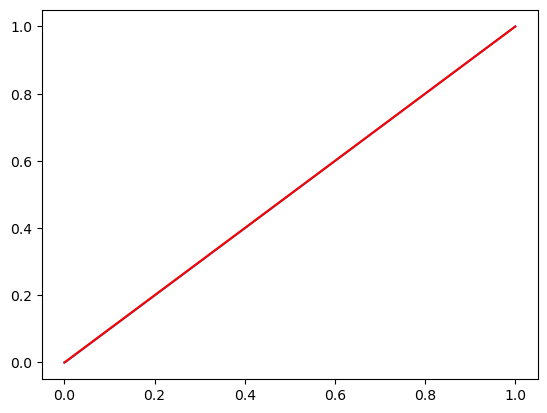

In [178]:
metrics(ytest,ypred)

In [179]:
#'Disorder Subclass_Tay-Sachs' as Target

In [180]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
ada=AdaBoostClassifier()
model_ada=ada.fit(xtrain,ytrain)
ypred=model_ada.predict(xtest)

The Accuracy_score:  0.8354366481574962
The precision_score:  0.5777777777777777
The recall_score:  0.2937853107344633
The f1 score :  0.3895131086142322
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      3254
         1.0       0.58      0.29      0.39       708

    accuracy                           0.84      3962
   macro avg       0.72      0.62      0.65      3962
weighted avg       0.81      0.84      0.81      3962

The roc_auc_score:  0.6235367856683994


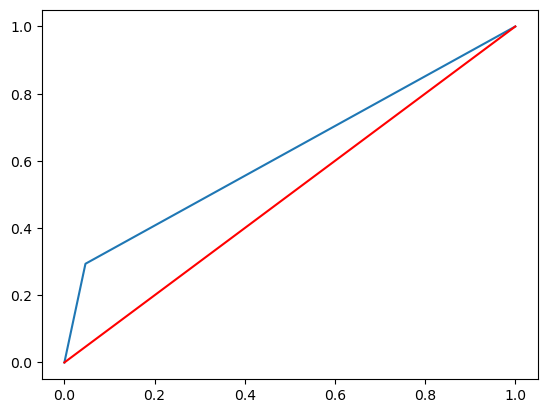

In [181]:
metrics(ytest,ypred)

**AdaBoostClassifier(with Hyperparameter Tuning)**

In [182]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [183]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

0.0    11441
1.0     4405
Name: Disorder Subclass_Mitochondrial myopathy, dtype: int64

In [257]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [185]:

params={'n_estimators':[100,115,120],
       'learning_rate':[0.1,0.01,0.001]}
ada=AdaBoostClassifier()
grd=GridSearchCV(estimator=ada,param_grid=params)
grd.fit(xtrain,ytrain)


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 115, 120]})

In [186]:
grd.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

The Accuracy_score:  0.4321049974760222
The precision_score:  0.2692307692307692
The recall_score:  0.43410852713178294
The f1 score :  0.3323442136498516
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.61      0.43      0.51      2672
         1.0       0.27      0.43      0.33      1290

    accuracy                           0.43      3962
   macro avg       0.44      0.43      0.42      3962
weighted avg       0.50      0.43      0.45      3962

The roc_auc_score:  0.4326231258413405


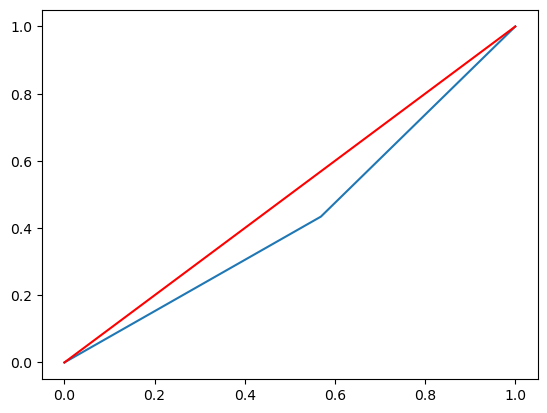

In [265]:
ada=AdaBoostClassifier(learning_rate= 0.01, n_estimators= 100)
model_ada_tu=ada.fit(xtrain,ytrain)
y_probabilities = model_rf_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [188]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [189]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

0.0    10686
1.0     5160
Name: Disorder Subclass_Leigh syndrome, dtype: int64

In [262]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [191]:

params={'n_estimators':[100,115,120],
       'learning_rate':[0.1,0.01,0.001]}
ada=AdaBoostClassifier()
grd=GridSearchCV(estimator=ada,param_grid=params)
grd.fit(xtrain,ytrain)


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 115, 120]})

In [192]:
grd.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

The Accuracy_score:  0.4321049974760222
The precision_score:  0.2692307692307692
The recall_score:  0.43410852713178294
The f1 score :  0.3323442136498516
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.61      0.43      0.51      2672
         1.0       0.27      0.43      0.33      1290

    accuracy                           0.43      3962
   macro avg       0.44      0.43      0.42      3962
weighted avg       0.50      0.43      0.45      3962

The roc_auc_score:  0.4326231258413405


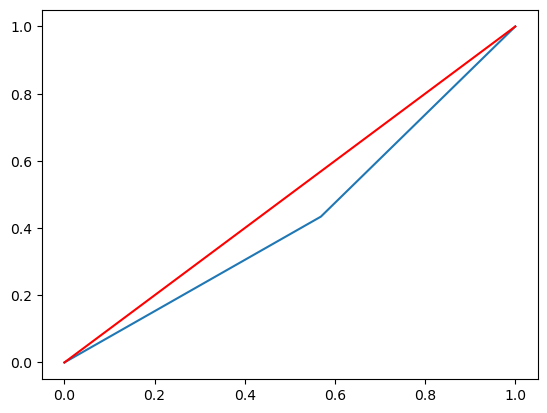

In [264]:
ada=AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)
model_ada_tu=ada.fit(xtrain,ytrain)
y_probabilities = model_rf_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [194]:
#'Disorder Subclass_Tay-Sachs' as Target

In [195]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

0.0    13013
1.0     2833
Name: Disorder Subclass_Tay-Sachs, dtype: int64

In [196]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [197]:
params={'n_estimators':[100,115,120],
       'learning_rate':[0.1,0.01,0.001]}
ada=AdaBoostClassifier()
grd=GridSearchCV(estimator=ada,param_grid=params)
grd.fit(xtrain,ytrain)


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 115, 120]})

In [198]:
grd.best_params_

{'learning_rate': 0.1, 'n_estimators': 120}

The Accuracy_score:  0.6236749116607774
The precision_score:  0.3081822635962763
The recall_score:  0.8884180790960452
The f1 score :  0.457620953073845
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.96      0.57      0.71      3254
         1.0       0.31      0.89      0.46       708

    accuracy                           0.62      3962
   macro avg       0.63      0.73      0.58      3962
weighted avg       0.84      0.62      0.67      3962

The roc_auc_score:  0.7272453026088708


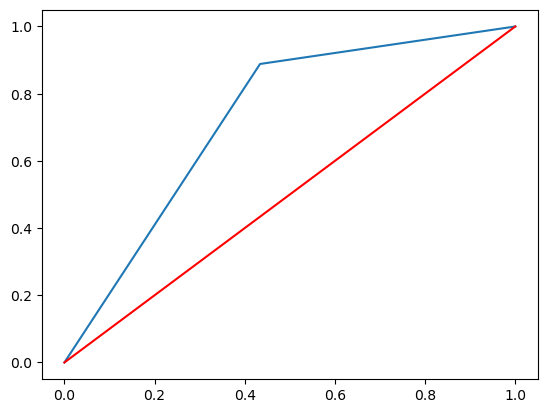

In [199]:
ada=AdaBoostClassifier(learning_rate= 0.1, n_estimators= 120)
model_ada_tu=ada.fit(xtrain,ytrain)
y_probabilities = model_rf_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

**GradientBoosting Classifier(Without Hyperpaparmeter Tuning)**

In [200]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [201]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
gb=GradientBoostingClassifier()
model_gb=gb.fit(xtrain,ytrain)
ypred=model_gb.predict(xtest)

The Accuracy_score:  0.7168096920747098
The precision_score:  0.3384615384615385
The recall_score:  0.019981834695731154
The f1 score :  0.03773584905660377
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83      2861
         1.0       0.34      0.02      0.04      1101

    accuracy                           0.72      3962
   macro avg       0.53      0.50      0.44      3962
weighted avg       0.62      0.72      0.61      3962

The roc_auc_score:  0.5024760624020425


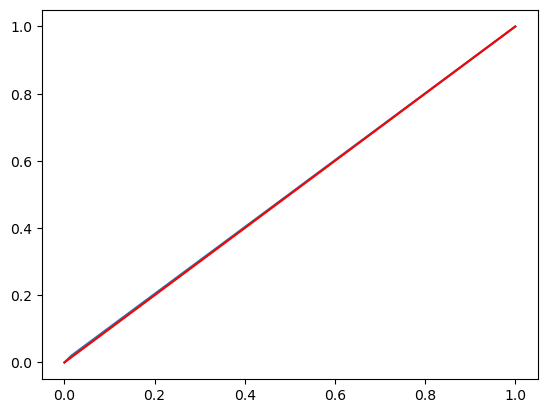

In [202]:
metrics(ytest,ypred)

In [203]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [204]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
gb=GradientBoostingClassifier()
model_gb=gb.fit(xtrain,ytrain)
ypred=model_gb.predict(xtest)

The Accuracy_score:  0.673902069661787
The precision_score:  0.4166666666666667
The recall_score:  0.003875968992248062
The f1 score :  0.007680491551459293
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80      2672
         1.0       0.42      0.00      0.01      1290

    accuracy                           0.67      3962
   macro avg       0.55      0.50      0.41      3962
weighted avg       0.59      0.67      0.55      3962

The roc_auc_score:  0.5006281042566031


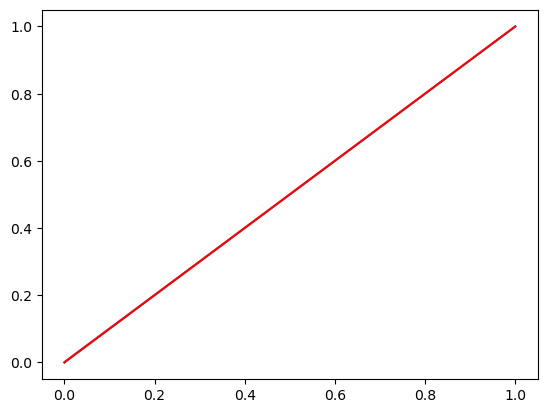

In [205]:
metrics(ytest,ypred)

In [206]:
#'Disorder Subclass_Tay-Sachs' as Target

In [207]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
gb=GradientBoostingClassifier()
model_gb=gb.fit(xtrain,ytrain)
ypred=model_gb.predict(xtest)

The Accuracy_score:  0.8346794548207975
The precision_score:  0.6007604562737643
The recall_score:  0.2231638418079096
The f1 score :  0.325437693099897
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      3254
         1.0       0.60      0.22      0.33       708

    accuracy                           0.83      3962
   macro avg       0.73      0.60      0.62      3962
weighted avg       0.81      0.83      0.80      3962

The roc_auc_score:  0.5954479319672614


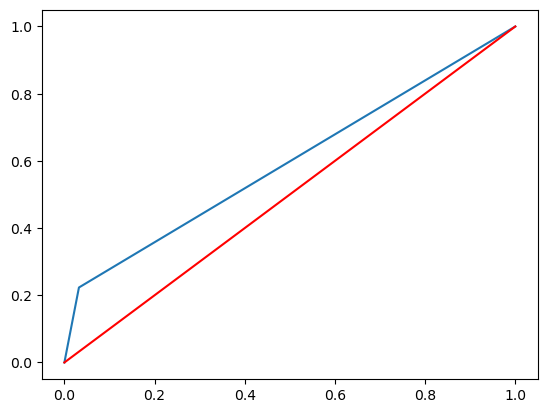

In [208]:
metrics(ytest,ypred)

**GradientBoosting(using Hyperparameters)**

In [209]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [210]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

0.0    11441
1.0     4405
Name: Disorder Subclass_Mitochondrial myopathy, dtype: int64

In [211]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Sym/ptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [212]:
class_weights = {0:4405/11441, 1:11441/4405}
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
gb=GradientBoostingClassifier()
grd=GridSearchCV(estimator=gb,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 115, 150]})

In [213]:
grd.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}

The Accuracy_score:  0.5936395759717314
The precision_score:  0.3740722414646215
The recall_score:  0.6866485013623979
The f1 score :  0.484304932735426
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.82      0.56      0.66      2861
         1.0       0.37      0.69      0.48      1101

    accuracy                           0.59      3962
   macro avg       0.60      0.62      0.57      3962
weighted avg       0.70      0.59      0.61      3962

The roc_auc_score:  0.6222477040191926


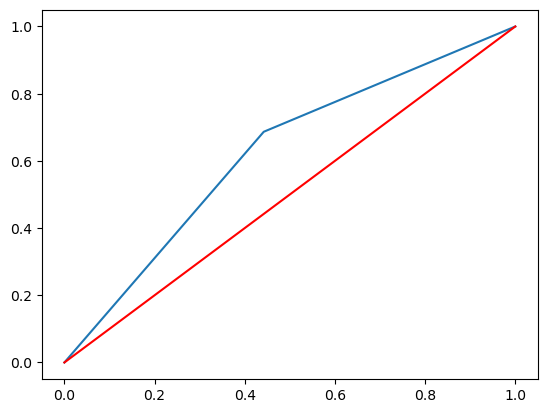

In [214]:
gb=GradientBoostingClassifier(learning_rate= 0.01,max_depth= 3,n_estimators=150)
gb_model_tu=gb.fit(xtrain,ytrain)
y_probabilities = model_rf_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [215]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [216]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

0.0    10686
1.0     5160
Name: Disorder Subclass_Leigh syndrome, dtype: int64

In [217]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [218]:
class_weights = {0:5160/10686, 1:10686/5160}
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
gb=GradientBoostingClassifier()
grd=GridSearchCV(estimator=gb,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 115, 150]})

In [219]:
grd.best_params_

{'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}

The Accuracy_score:  0.4321049974760222
The precision_score:  0.2692307692307692
The recall_score:  0.43410852713178294
The f1 score :  0.3323442136498516
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.61      0.43      0.51      2672
         1.0       0.27      0.43      0.33      1290

    accuracy                           0.43      3962
   macro avg       0.44      0.43      0.42      3962
weighted avg       0.50      0.43      0.45      3962

The roc_auc_score:  0.4326231258413405


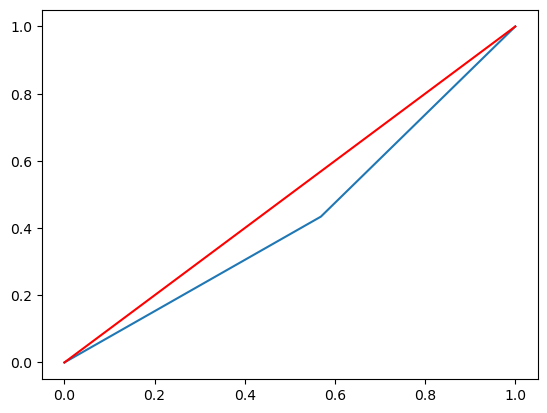

In [220]:
gb=GradientBoostingClassifier(learning_rate= 0.001,max_depth= 2,n_estimators=100)
gb_model_tu=gb.fit(xtrain,ytrain)
y_probabilities = model_rf_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [221]:
#'Disorder Subclass_Tay-Sachs' as Target

In [222]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

0.0    13013
1.0     2833
Name: Disorder Subclass_Tay-Sachs, dtype: int64

In [223]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [224]:
class_weights = {0:2833/13013, 1:13013/2833}
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
gb=GradientBoostingClassifier()
grd=GridSearchCV(estimator=gb,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 115, 150]})

In [225]:
grd.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

The Accuracy_score:  0.6236749116607774
The precision_score:  0.3081822635962763
The recall_score:  0.8884180790960452
The f1 score :  0.457620953073845
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.96      0.57      0.71      3254
         1.0       0.31      0.89      0.46       708

    accuracy                           0.62      3962
   macro avg       0.63      0.73      0.58      3962
weighted avg       0.84      0.62      0.67      3962

The roc_auc_score:  0.7272453026088708


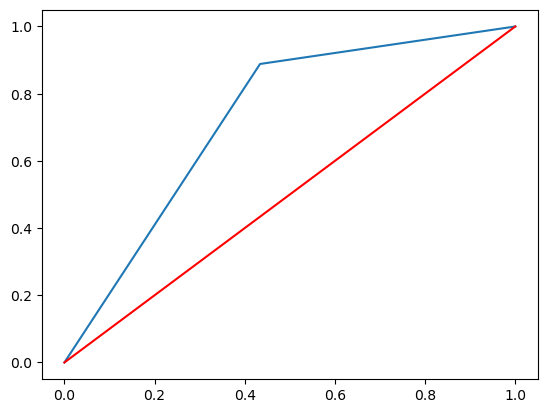

In [226]:
gb=GradientBoostingClassifier(learning_rate= 0.1,max_depth= 3,n_estimators=100)
gb_model_tu=gb.fit(xtrain,ytrain)
y_probabilities = model_rf_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

**XGBoostClassifier(Without Hyperparameters)**

In [227]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [228]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

0.0    11441
1.0     4405
Name: Disorder Subclass_Mitochondrial myopathy, dtype: int64

In [229]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
xgb=XGBClassifier()
xgb_model=xgb.fit(xtrain,ytrain)
ypred=xgb_model.predict(xtest)

The Accuracy_score:  0.6910651186269561
The precision_score:  0.3875685557586837
The recall_score:  0.19255222524977295
The f1 score :  0.25728155339805825
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80      2861
         1.0       0.39      0.19      0.26      1101

    accuracy                           0.69      3962
   macro avg       0.56      0.54      0.53      3962
weighted avg       0.64      0.69      0.65      3962

The roc_auc_score:  0.537730149674869


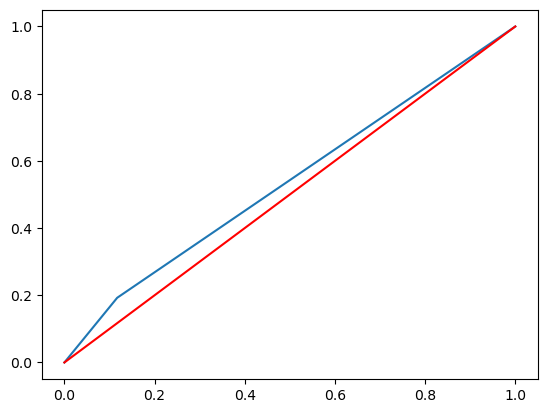

In [230]:
metrics(ytest,ypred)

In [231]:
# 'Disorder Subclass_Leigh syndrome' as Target

In [232]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

0.0    10686
1.0     5160
Name: Disorder Subclass_Leigh syndrome, dtype: int64

In [233]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
xgb=XGBClassifier()
xgb_model=xgb.fit(xtrain,ytrain)
ypred=xgb_model.predict(xtest)

The Accuracy_score:  0.6542150429076224
The precision_score:  0.4441340782122905
The recall_score:  0.24651162790697675
The f1 score :  0.317048853439681
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77      2672
         1.0       0.44      0.25      0.32      1290

    accuracy                           0.65      3962
   macro avg       0.57      0.55      0.54      3962
weighted avg       0.62      0.65      0.62      3962

The roc_auc_score:  0.5487797660492968


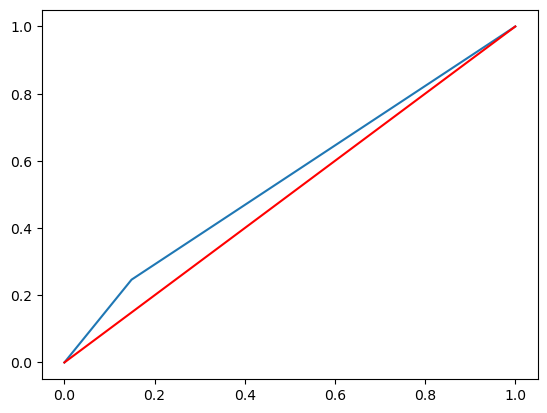

In [234]:
metrics(ytest,ypred)

In [235]:
# 'Disorder Subclass_Tay-Sachs' as Target

In [236]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

0.0    13013
1.0     2833
Name: Disorder Subclass_Tay-Sachs, dtype: int64

In [237]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
xgb=XGBClassifier()
xgb_model=xgb.fit(xtrain,ytrain)
ypred=xgb_model.predict(xtest)

The Accuracy_score:  0.8235739525492176
The precision_score:  0.5106888361045131
The recall_score:  0.3036723163841808
The f1 score :  0.3808680248007086
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      3254
         1.0       0.51      0.30      0.38       708

    accuracy                           0.82      3962
   macro avg       0.69      0.62      0.64      3962
weighted avg       0.80      0.82      0.80      3962

The roc_auc_score:  0.6201828084686731


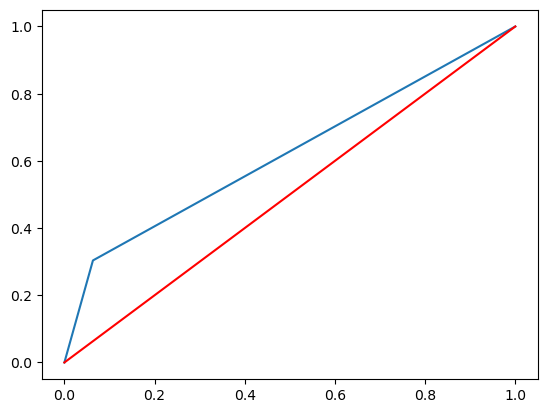

In [238]:
metrics(ytest,ypred)

**XGBoostClassifier(With Hyperparameter)**

In [239]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [240]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

0.0    11441
1.0     4405
Name: Disorder Subclass_Mitochondrial myopathy, dtype: int64

In [241]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [242]:
class_weights = {0:4405/11441, 1:11441/4405}
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
xgb=XGBClassifier()
grd=GridSearchCV(estimator=xgb,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 115, 150]})

In [243]:
grd.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}

The Accuracy_score:  0.5936395759717314
The precision_score:  0.3740722414646215
The recall_score:  0.6866485013623979
The f1 score :  0.484304932735426
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.82      0.56      0.66      2861
         1.0       0.37      0.69      0.48      1101

    accuracy                           0.59      3962
   macro avg       0.60      0.62      0.57      3962
weighted avg       0.70      0.59      0.61      3962

The roc_auc_score:  0.6222477040191926


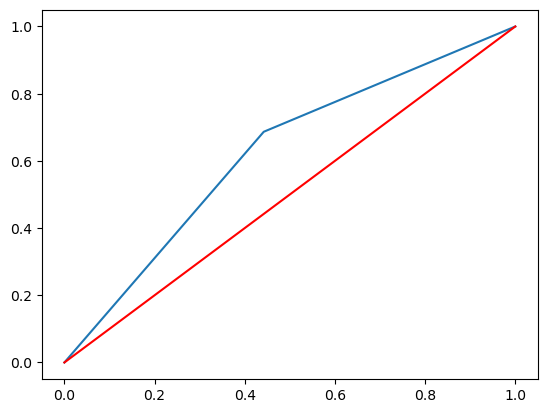

In [244]:
xgb=XGBClassifier(learning_rate= 0.1,max_depth= 3,n_estimators=150)
xgb_model_tu=xgb.fit(xtrain,ytrain)
y_probabilities = model_rf_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [245]:
# 'Disorder Subclass_Leigh syndrome' as Target

In [246]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

0.0    10686
1.0     5160
Name: Disorder Subclass_Leigh syndrome, dtype: int64

In [247]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [248]:

params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
xgb=XGBClassifier()
grd=GridSearchCV(estimator=xgb,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 115, 150]})

In [249]:
grd.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

The Accuracy_score:  0.4321049974760222
The precision_score:  0.2692307692307692
The recall_score:  0.43410852713178294
The f1 score :  0.3323442136498516
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.61      0.43      0.51      2672
         1.0       0.27      0.43      0.33      1290

    accuracy                           0.43      3962
   macro avg       0.44      0.43      0.42      3962
weighted avg       0.50      0.43      0.45      3962

The roc_auc_score:  0.4326231258413405


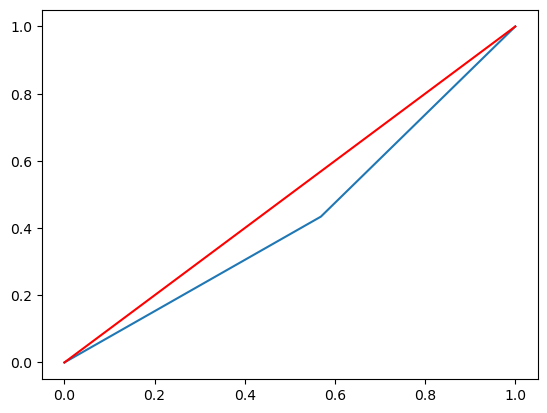

In [250]:
xgb=XGBClassifier(learning_rate= 0.1,max_depth= 3,n_estimators=150)
xgb_model_tu=xgb.fit(xtrain,ytrain)
y_probabilities = model_rf_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [251]:
# 'Disorder Subclass_Tay-Sachs' as Target

In [252]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

0.0    13013
1.0     2833
Name: Disorder Subclass_Tay-Sachs, dtype: int64

In [253]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [254]:
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
xgb=XGBClassifier()
grd=GridSearchCV(estimator=xgb,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 115, 150]})

In [255]:
grd.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}

The Accuracy_score:  0.6236749116607774
The precision_score:  0.3081822635962763
The recall_score:  0.8884180790960452
The f1 score :  0.457620953073845
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.96      0.57      0.71      3254
         1.0       0.31      0.89      0.46       708

    accuracy                           0.62      3962
   macro avg       0.63      0.73      0.58      3962
weighted avg       0.84      0.62      0.67      3962

The roc_auc_score:  0.7272453026088708


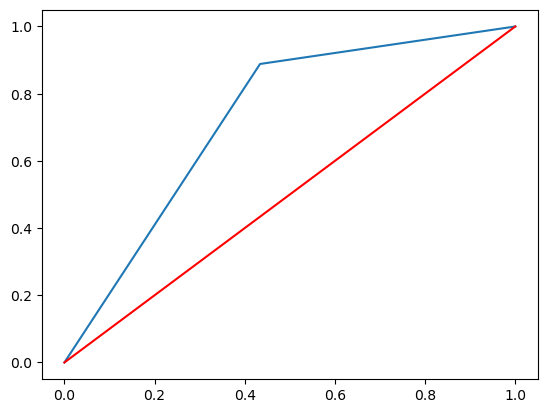

In [256]:
xgb=XGBClassifier(learning_rate= 0.1,max_depth= 2,n_estimators=150)
xgb_model_tu=xgb.fit(xtrain,ytrain)
y_probabilities = model_rf_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

**After applying all the models for 3 different genetic disorders and seeing the performance of the Models.We came to the conclusion that AdaboostClassifier with Hyperparameter tuning is working best for all three.**

# **Overall fit of Final Models**

**'Disorder Subclass_Mitochondrial myopathy' as Target**

The Accuracy_score:  0.42074709742554267
The precision_score:  0.3222156045265039
The recall_score:  0.9827429609445958
The f1 score :  0.48531060775958734
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.97      0.20      0.34      2861
         1.0       0.32      0.98      0.49      1101

    accuracy                           0.42      3962
   macro avg       0.65      0.59      0.41      3962
weighted avg       0.79      0.42      0.38      3962

The roc_auc_score:  0.5936084605491941


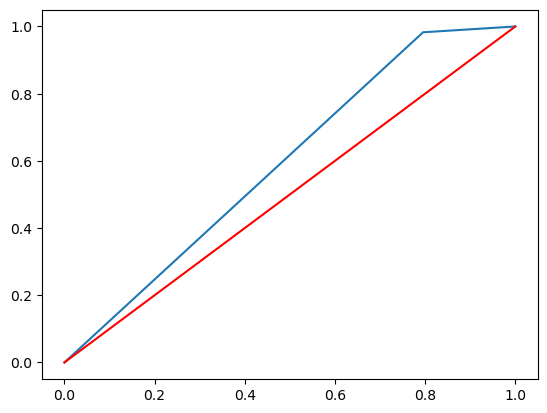

In [280]:
metrics(ytest_mm,ypred_mitochondrial_myopathy)

**'Disorder Subclass_Leigh syndrome' as Target**

The Accuracy_score:  0.4295810196870268
The precision_score:  0.3589296102385108
The recall_score:  0.9565891472868217
The f1 score :  0.5219966159052454
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.89      0.18      0.29      2672
         1.0       0.36      0.96      0.52      1290

    accuracy                           0.43      3962
   macro avg       0.63      0.57      0.41      3962
weighted avg       0.72      0.43      0.37      3962

The roc_auc_score:  0.565869423942812


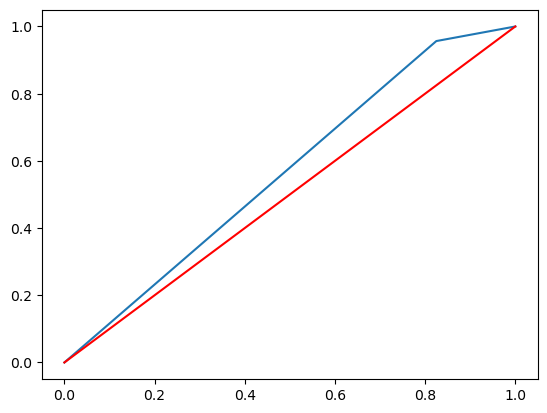

In [281]:
metrics(ytest_ls,ypred_leigh_syndrome)

**'Disorder Subclass_Tay-Sachs' as Target**

The Accuracy_score:  0.7258960121150934
The precision_score:  0.3721244925575101
The recall_score:  0.7768361581920904
The f1 score :  0.5032021957913997
The Classification_report : 
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81      3254
         1.0       0.37      0.78      0.50       708

    accuracy                           0.73      3962
   macro avg       0.65      0.75      0.66      3962
weighted avg       0.84      0.73      0.76      3962

The roc_auc_score:  0.7458243483031749


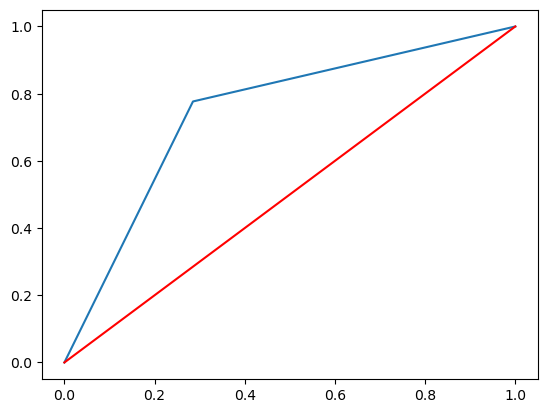

In [282]:
metrics(ytest_ts,ypred_Tay_Sachs)

# Business Interpretation

**'Disorder Subclass_Mitochondrial myopathy' as Target**

In [297]:
feature_imp_mm=pd.DataFrame()
feature_imp_mm['Feature']=xtrain_mm.columns
feature_imp_mm['Importance']=model_rf_tu_mm.feature_importances_
feature_imp_mm=feature_imp_mm.sort_values(by='Importance',ascending=False)
feature_imp_mm

,Feature,Importance
13,Symptom 5_1.0,0.172972
2,Maternal gene_Yes,0.146133
8,Blood cell count (mcL),0.140135
12,Symptom 4_1.0,0.130499
11,Symptom 3_1.0,0.117982
10,Symptom 2_1.0,0.068966
9,Symptom 1_1.0,0.058772
1,Inherited from father_Yes,0.038837
0,Genes in mother's side_Yes,0.035262
3,Paternal gene_Yes,0.032008


(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ]),
 [Text(0.0, 0, '0.000'),
  Text(0.025, 0, '0.025'),
  Text(0.05, 0, '0.050'),
  Text(0.07500000000000001, 0, '0.075'),
  Text(0.1, 0, '0.100'),
  Text(0.125, 0, '0.125'),
  Text(0.15000000000000002, 0, '0.150'),
  Text(0.17500000000000002, 0, '0.175'),
  Text(0.2, 0, '0.200')])

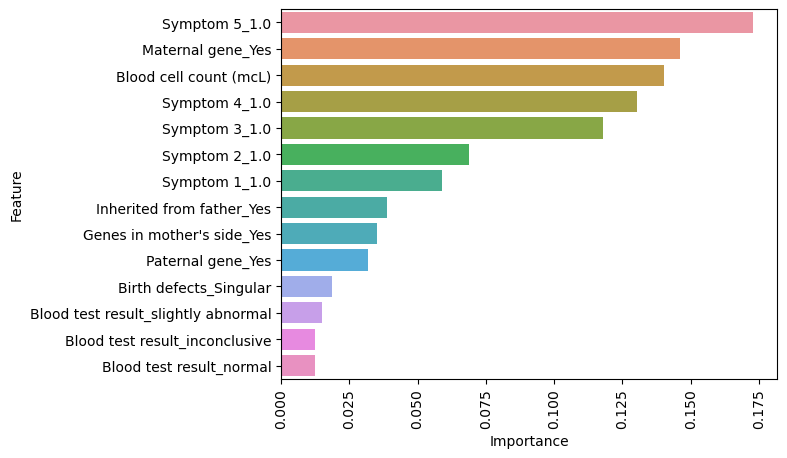

In [300]:
sns.barplot(y=feature_imp_mm['Feature'],x=feature_imp_mm['Importance'])
plt.xticks(rotation=90)

- Inference:
    
    
- 1)Symptoms (5_1.0, 4_1.0, 3_1.0, 2_1.0, 1_1.0): Symptoms are highly important features for predicting mitochondrial disease. This suggests that the presence of certain symptoms plays a significant role in diagnosing the disease. Monitoring and early detection of these symptoms could be crucial for timely intervention and treatment.

- 2)Maternal Gene (Maternal gene_Yes): The presence of maternal genes has a relatively high importance score. Mitochondrial diseases are often inherited through the maternal line due to the transmission of mitochondrial DNA from the mother to her offspring. Understanding the maternal genetic background could provide valuable insights into the risk of mitochondrial disease.

- 3)Blood Cell Count: Blood cell count is also an important feature. Abnormalities in blood cell count could indicate underlying health issues, including mitochondrial dysfunction. Regular monitoring of blood cell count may help in early detection and management of mitochondrial disease.

- 4)Inherited Factors (Inherited from father_Yes, Genes in mother's side_Yes, Paternal gene_Yes): Inherited genetic factors, both from the father and the mother, play a role in mitochondrial disease. This emphasizes the importance of understanding the genetic predisposition of individuals and their familial history in assessing the risk of mitochondrial disease.

- 5)Birth Defects: Although less important compared to symptoms and genetic factors, the presence of birth defects still contributes to the prediction of mitochondrial disease. Birth defects could indicate abnormalities in embryonic development, which might be associated with mitochondrial dysfunction.

- 6)Blood Test Results: Abnormal blood test results, such as slightly abnormal or inconclusive results, also contribute to predicting mitochondrial disease. Blood tests can provide valuable information about metabolic function and organ health, which are relevant in the context of mitochondrial disorders.

- In summary, the interpretation of relative importance scores suggests that a combination of genetic factors, symptoms, and clinical indicators such as blood test results are crucial for predicting mitochondrial disease. This information can guide healthcare professionals in diagnosing and managing the condition effectively. Additionally, it underscores the importance of personalized medicine and genetic counseling in addressing mitochondrial disorders.

**'Disorder Subclass_Leigh syndrome' as Target**

In [298]:
feature_imp_ls=pd.DataFrame()
feature_imp_ls['Feature']=xtrain_ls.columns
feature_imp_ls['Importance']=model_rf_tu_ls.feature_importances_
feature_imp_ls=feature_imp_ls.sort_values(by='Importance',ascending=False)
feature_imp_ls

,Feature,Importance
8,Blood cell count (mcL),0.357864
13,Symptom 5_1.0,0.072989
12,Symptom 4_1.0,0.069076
10,Symptom 2_1.0,0.067464
2,Maternal gene_Yes,0.060471
9,Symptom 1_1.0,0.054926
11,Symptom 3_1.0,0.052649
3,Paternal gene_Yes,0.049992
0,Genes in mother's side_Yes,0.047410
1,Inherited from father_Yes,0.045705


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35'),
  Text(0.4, 0, '0.40')])

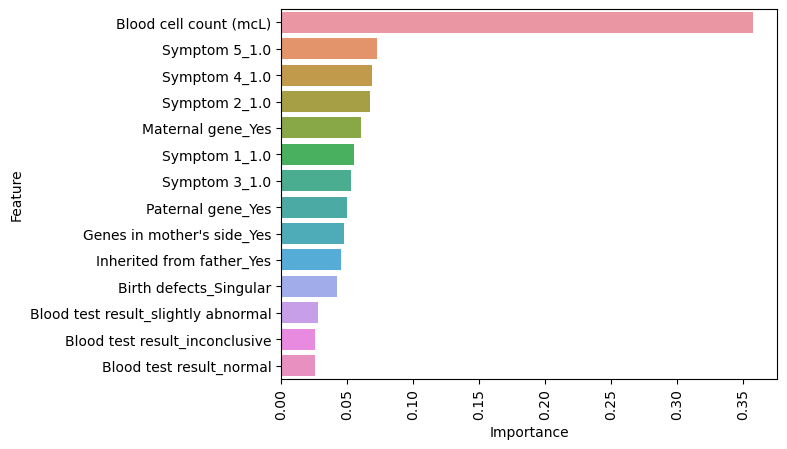

In [301]:
sns.barplot(y=feature_imp_ls['Feature'],x=feature_imp_ls['Importance'])
plt.xticks(rotation=90)


- Inference:
- Blood cell count (mcL): This feature has the highest relative importance score, indicating that it plays a significant role in predicting Leigh syndrome disease. A higher blood cell count might be associated with a higher likelihood of Leigh syndrome.

- Symptoms: Symptoms 1, 2, 3, 4, and 5 have relatively high importance scores. This suggests that the presence of specific symptoms, as indicated by these binary features, is strongly associated with Leigh syndrome disease.

- Maternal gene and Paternal gene: The presence of certain genes, both maternal and paternal, also holds significant importance in predicting Leigh syndrome disease. This suggests a genetic component to the disease, with certain genes potentially increasing the risk.

- Inheritance factors: Features related to inheritance, such as "Genes in mother's side" and "Inherited from father," also have notable importance scores. This further emphasizes the genetic predisposition aspect of Leigh syndrome.

- Birth defects: The presence of singular birth defects also shows some importance, albeit lower compared to other features. Birth defects might be correlated with Leigh syndrome or other related conditions.

- Blood test results: Different blood test results (normal, slightly abnormal, inconclusive) also contribute to predicting Leigh syndrome, although they have comparatively lower importance scores than genetic and symptom-related features.

- From a business perspective, these interpretations suggest that factors related to genetics (both maternal and paternal), specific symptoms, blood cell count, and birth defects are crucial indicators for predicting Leigh syndrome disease. This information could guide healthcare professionals in diagnosing and managing the condition more effectively, potentially enabling earlier intervention or targeted treatment strategies. Additionally, it underscores the importance of genetic counseling and screening for families with a history of Leigh syndrome or related genetic disorders.

**'Disorder Subclass_Tay-Sachs' as Target**

In [299]:
feature_imp_ts=pd.DataFrame()
feature_imp_ts['Feature']=xtrain_ts.columns
feature_imp_ts['Importance']=model_rf_tu_ts.feature_importances_
feature_imp_ts=feature_imp_ts.sort_values(by='Importance',ascending=False)
feature_imp_ts

,Feature,Importance
8,Blood cell count (mcL),0.200296
13,Symptom 5_1.0,0.160904
12,Symptom 4_1.0,0.113578
11,Symptom 3_1.0,0.086503
10,Symptom 2_1.0,0.081533
2,Maternal gene_Yes,0.063752
9,Symptom 1_1.0,0.059185
1,Inherited from father_Yes,0.051018
0,Genes in mother's side_Yes,0.044715
3,Paternal gene_Yes,0.040988


(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225]),
 [Text(0.0, 0, '0.000'),
  Text(0.025, 0, '0.025'),
  Text(0.05, 0, '0.050'),
  Text(0.07500000000000001, 0, '0.075'),
  Text(0.1, 0, '0.100'),
  Text(0.125, 0, '0.125'),
  Text(0.15000000000000002, 0, '0.150'),
  Text(0.17500000000000002, 0, '0.175'),
  Text(0.2, 0, '0.200'),
  Text(0.225, 0, '0.225')])

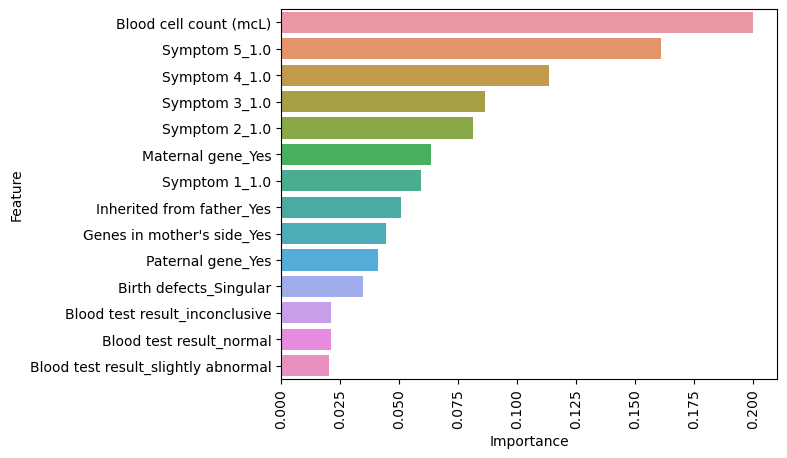

In [302]:
sns.barplot(y=feature_imp_ts['Feature'],x=feature_imp_ts['Importance'])
plt.xticks(rotation=90)

- Inference:
- Blood cell count (mcL) (Relative Importance: 0.200296): This feature seems to have the highest importance according to the model. A higher blood cell count might be indicative of certain conditions or abnormalities associated with Tay-Sachs disease. Monitoring blood cell count could be crucial in diagnosing or predicting the disease.

- Symptoms: Symptoms 5, 4, 3, 2, and 1 (Relative Importance: 0.160904, 0.113578, 0.086503, 0.081533, 0.059185): The presence of various symptoms seems to be strongly associated with Tay-Sachs disease. Each symptom has a significant impact on the prediction, suggesting that observing and recording symptoms can aid in diagnosing the disease.

- Genetic Factors: Maternal gene, Inherited from father, Genes in mother's side, Paternal gene (Relative Importance: 0.063752, 0.051018, 0.044715, 0.040988): Genetic factors play a notable role in Tay-Sachs disease. These features indicate whether certain genetic mutations or inheritance patterns are present, which are known to be associated with the disease.

- Birth defects (Relative Importance: 0.034857): The presence of singular birth defects also appears to contribute to predicting Tay-Sachs disease. Birth defects could be indicative of underlying genetic disorders or abnormalities.

- Blood test results: Inconclusive, Normal, Slightly abnormal (Relative Importance: 0.021171, 0.021016, 0.020485): Blood test results, particularly when inconclusive or showing slight abnormalities, seem to have a minor but still relevant impact on predicting Tay-Sachs disease.

- Overall, these relative importance scores suggest that a combination of genetic factors, symptoms, blood cell count, and other medical indicators can be important in predicting Tay-Sachs disease. A holistic approach that considers multiple factors, including genetic predisposition and observable symptoms, could be crucial for accurate diagnosis and management of the disease.






# **Changes from the base model had the most effect on model performance**

- Ensemble Techniques with Hyper-parameter Tuning helped the Most.

# key risks to  results and interpretation

- Insufficient data for each disorder to understand the patterns correctly.
- Highly imbalanced Target.
- Mutliclass Target.